<a href="https://colab.research.google.com/github/APaulalvarez/Coder---Data-Science-II/blob/main/Proyecto_Final_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <U>**Clasificación del desempeño estudiantil**</U>
## **Primera Preentrega - Data Science II: Machine Learning para la Ciencia de Datos - Coderhouse**
### **_Alumna:_** Ana Paula Alvarez Pringles
### **_Comisión:_** 60940
### **_Porfesor:_**  Jorge Ruiz
### **_Tutor:_**  Fabricio Di Palma


---



### **Resumen**

En la actualidad, la educación está recibiendo una creciente atención, y el análisis del rendimiento de los estudiantes juega un papel crucial en este contexto. Este tipo de análisis ayuda a instituciones educativas, padres y estudiantes a reconocer las necesidades, fortalezas y áreas que necesitan mejora. Con esta información, las escuelas tienen la capacidad de diseñar programas de aprendizaje más eficaces y ajustados a las necesidades individuales de los estudiantes.

Para esto se trabajó con un dataset que cuenta con 2392 registros de estudiantes de secundaria y 15 variables de contenido demográfico, hábitos de estudio, apoyo familiar, entre otras.

Estos datos no necesitaron grandes procesos de data wrangling ya que no contaba con datos nulos ni duplicados. Tampoco nos encontramos con outliers. También las variables categóricas ya estaban codificadas a numéricas.

En primera instancia realizamos un análisis univariado, donde observamos la distribución de las variables numéricas, observando distribuciones de tipo uniforme. Por otro lado, de las variables categóricas, el género más frecuente es el femenino y de etnicidad caucásica.En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.
En caunto a los alumnos, la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.
En esta instancia nos encontramos con numerosas variables desbalanceadas.

En cuanto a la variable target "GradeClass", se observa que el 50% de los alumnos obtienen la clasificación más baja, mientras que el resto de las notas se asignan a menos del 20% de los alumnos cada una. Solo un 5% obtiene las mejores clasificaciones.

Luego hicimos una exploracion de las realciones bivariadas, encontrando una alta correlación positiva entre nuestra variable target y las ausencias a clases, mientras que las correlaciones con el resto de las variables fueron bajas.


### **Objetivo**

Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje automatico para clasificar el desempeño de alumnos de secundaria a partir de datos demográficos, del entorno familiar y demás actividades que desarrollen, y así poder identificar que factores afectan en mayor medida a las calificaciones obtenidas, como ayudar en la planificación de estrategias educativas.

###**Contexto comercial**

Somos una consultora que trabaja tanto con el ámbito privado como público de la educación en diversos niveles, acompañando y asesorando no solo a instituciones sino también a familias.

En este proyecto, trabajamos en conjunto con una institución de educación secundaria para evaluar posibles factores que estén afectando el desempeño estudiantil, dado que la institución observó que gran parte de los alumnos presentaban bajas calificaciones cada vez con mayor frecuencia.

###**Hipótesis**

El modelo de aprendizaje automático será capaz de clasificar las diferentes calificaciones basándose en atributos sobre hábitos de estudio, participación parental, actividades extracurriculares. Se espera que estos atributos proporcionen información suficiente para predecir de manera efectiva las categorías de calificaciones.

# Carga de dependencias

In [21]:
# dataset
from google.colab import files
import io

# manejo de datos
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pointbiserialr

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Data Acquisition

El data set fue obtenido desde el sitio https://www.kaggle.com


In [2]:
dataset = files.upload()


Saving Student_performance.csv to Student_performance.csv


In [22]:
df = pd.read_csv(io.BytesIO(dataset["Student_performance.csv"]),index_col=[0] )
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93,2.00
1002,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04,1.00
1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11,4.00
1004,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05,3.00
1005,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29,4.00


##Descripción de variables y dataset

Student ID: Número único para identificar a cada alumno (1001 a 3392).
### Demographic Details
- Age: Edad de los alumnos (15 a 18). Cuantitativa discreta
- Gender: Género de cada estudiante. 0 (Masculino), 1 (Femenino). Cualitativa binaria
- Ethnicity: 0 (Caucásico), 1 (Afroamericano),2 (Asiático), 3 (Otro). Cualitativa nominal
- ParentalEducation: Nivel de educación alcanzado por los padres.
  0 (Ninguno), 1 (Secundario), 2 (Universitario no completo), 3 (Universitario), 4 (Más alto). Cualitativa nominal
### Study Habits
- StudyTimeWeekly: Cantidad de tiempo de estudio por semana expresada en horas (0 a 20). Cuantitativa contínua
- Absences: Días ausentes durante el año escolar (0 a 30). Cuantitativa discreta
- Tutoring: presencia de tutoría 0 (no), 1 (si). Cualitativa binaria
### Parental Involvement
- ParentalSupport: Nivel de apoyo otorgado por el grupo familiar.
  0 (Ninguno), 1 (Bajo), 2 (Moderado), 3 (Alto), 4 (Muy alto). Cualitativa nominal
### Extracurricular Activities
- Extracurricular: Participación en actividades extracurriculares 0 (no), 1 (si). Cualitativa binaria
- Sports: Participación en actividades deportivas 0 (no), 1 (si). Cualitativa binaria
- Music: Participación en actividades musicales 0 (no), 1 (si). Cualitativa binaria
- Volunteering: Participación en voluntariados 0 (no), 1 (si). Cualitativa binaria
### Academic Performance
- GPA: "Grade Point Average" forma de clasificación en una escala de 2.0 a 4.0, influenciada por los hábitos de estudio, soporte del grupo familiar y las actividades extracurriculares. Cuantitativa contínua
### Variable Target
- GradeClass: Clasificación de las notas de los alumnos basados en el indice GPA:

    0: 'A' (GPA >= 3.5)

    1: 'B' (3.0 <= GPA < 3.5)

    2: 'C' (2.5 <= GPA < 3.0)

    3: 'D' (2.0 <= GPA < 2.5)

    4: 'F' (GPA < 2.0)

La variable target es categórica ordinal.

In [23]:
# Estructura del ds
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 280.3 KB


(2392, 14)

In [24]:
df.duplicated().value_counts()

,count
False,2392


In [25]:
print(df.isnull().sum())

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Este dataset cuenta con 2392 registros y 15 variables.
Podría modificarse las variables int64 y float64 a formatos de 32 bits para ahorrar memoria, aunque en este caso no son tantos los datos en el dataset.
Además, este dataset no posee valores duplicados ni valores nulos.
Tampoco haria falta aplicar algun tipo de encoder, ya que la mayoría de las variables categóricas ya están codeadas en forma binaria (0,1) u como variables discretas.

In [26]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,2392.00,16.47,1.12,15.00,15.00,16.00,17.00,18.00
Gender,2392.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Ethnicity,2392.00,0.88,1.03,0.00,0.00,0.00,2.00,3.00
ParentalEducation,2392.00,1.75,1.00,0.00,1.00,2.00,2.00,4.00
StudyTimeWeekly,2392.00,9.77,5.65,0.00,5.04,9.71,14.41,19.98
Absences,2392.00,14.54,8.47,0.00,7.00,15.00,22.00,29.00
Tutoring,2392.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
ParentalSupport,2392.00,2.12,1.12,0.00,1.00,2.00,3.00,4.00
Extracurricular,2392.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Sports,2392.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


En un principio, no se estarían observando valores atípicos en ninguna de las variables.
En cuanto a la distribución de las variables contínuas StudyTimeWeekly y GPA, parecen ser bastante simétricas dada la poca diferencia entre su media y su mediana. Pero lo analizaremos en profundidad en la siguiente sección, mediante histogramas o coeficientes de variación.
Algunas variables son categóricas codificadas (ver descripción de las variables), a estas las trasformaremos en la sección siguiente para que su interpretación tenga más sentido.

In [27]:
df.drop(['GPA'], axis=1, inplace=True)
df.shape

(2392, 13)

Remuevo la variable GPA ya que es redundante con nuestra variable target GradeClass.
El dataset queda conformado entonces por 2392 registros y 13 variables.

# EDA y visualización de los datos

* Realizamos una primera exploración de la distribución de las variables tanto numéricas como categóricas, y la variable target.
*Realizamos diversos gráficos para explorar la relación entre las variables primero de manera univariada y luego exploramos relaciones bivariadas y con la variable target.

Cada apartado contiene su explicación o interpretación correspondiente.

##Análisis Univariado

###Distribución de Variables Cuantitativas

In [28]:
# Calcular el coeficiente de variación para cada variable
NumVar = ['StudyTimeWeekly', 'Absences','Age']
for _, v in enumerate(NumVar):
    print("Coeficiente de variacion de", v,":", (df[v].std() / df[v].mean() *100).round(1))

Coeficiente de variacion de StudyTimeWeekly : 57.8
Coeficiente de variacion de Absences : 58.2
Coeficiente de variacion de Age : 6.8


Siguiendo los criterios de Martinez 2007, las variables StudyTimeWeekly y las ausencias no son variables homogéneas y la media no seria representativa.
En estos casos sería conveniente en caso de necesitar algun valor de referencia, utilizar la mediana en vez de la media.
La edad de los alumnos si son homogéneos.

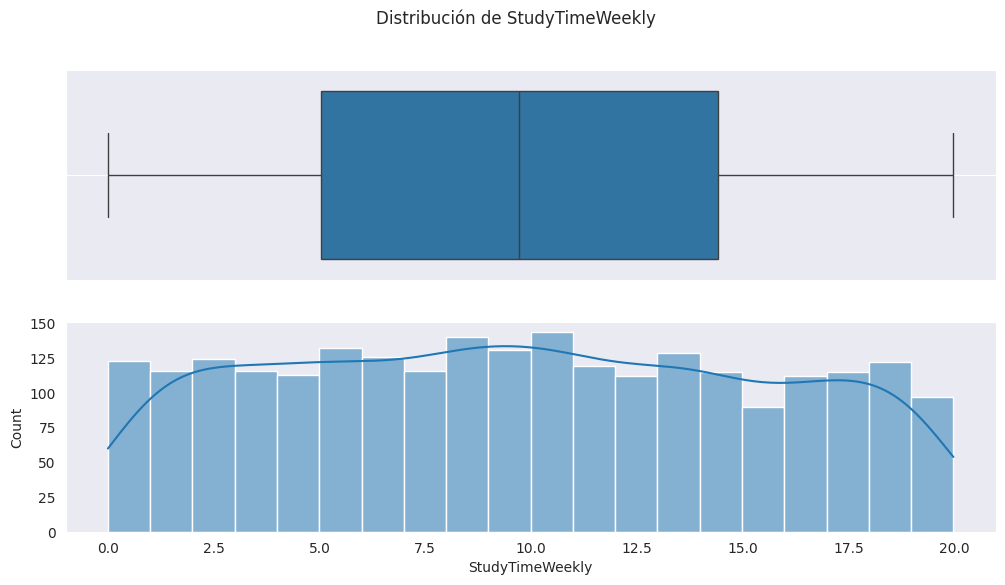

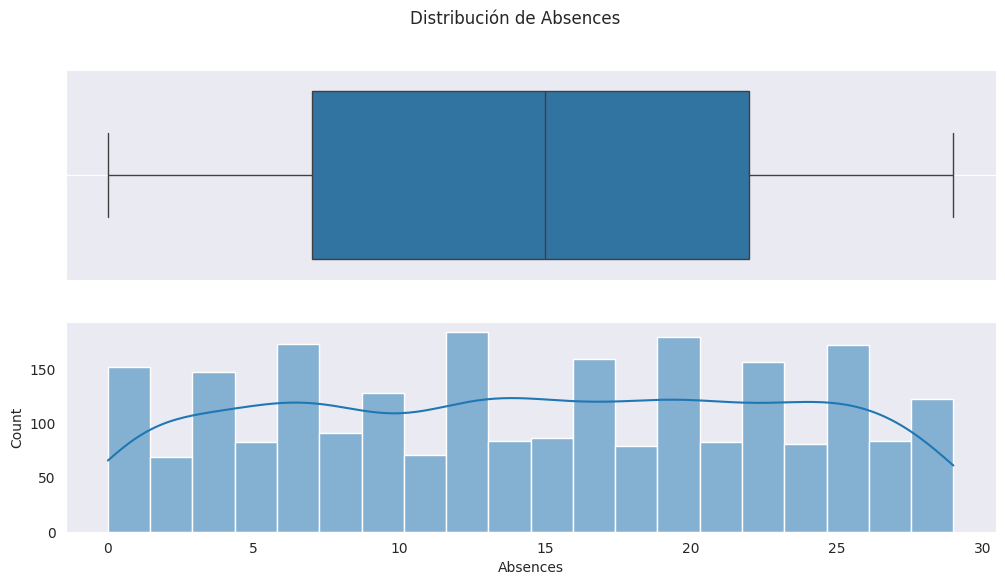

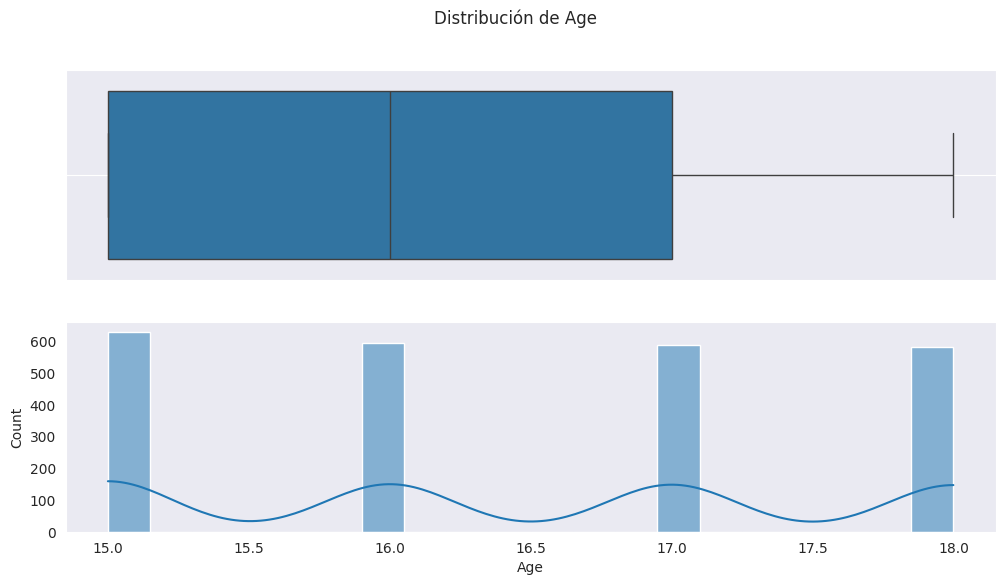

In [29]:
for _, feature in enumerate(NumVar):
    fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    fig.suptitle(f'Distribución de {feature}')
    sns.boxplot(x = df[feature], ax = axes[0])
    sns.histplot(x = df[feature], ax = axes[1],kde=True, bins=20)
    axes[0].grid()
    axes[1].grid()
    plt.xlabel(feature)
    plt.show()

In [30]:
for variable in NumVar:
    print(f"Estadísticas descriptivas para {variable}:")
    print(stats.describe(df[variable]))
    print("-" * 30)  # Separador entre variables

Estadísticas descriptivas para StudyTimeWeekly:
DescribeResult(nobs=2392, minmax=(0.001056538645936, 19.97809399526153), mean=9.771991919431738, variance=31.953856561605583, skewness=0.050036669884928095, kurtosis=-1.1358169615994715)
------------------------------
Estadísticas descriptivas para Absences:
DescribeResult(nobs=2392, minmax=(0, 29), mean=14.54138795986622, variance=71.69715708572699, skewness=-0.02600077249756051, kurtosis=-1.1762755655561952)
------------------------------
Estadísticas descriptivas para Age:
DescribeResult(nobs=2392, minmax=(15, 18), mean=16.468645484949832, variance=1.262922798565971, skewness=0.03577097473505741, kurtosis=-1.371740386570325)
------------------------------


Podemos observar la ausencia de outliers en las variables. Tanto el tiempo de estudio como las ausencias poseen simetría en las distribuciones, pero presentan kurtosis platicúrtica. Si bien segun el coeficiente de variación segun Martinez 2007, serían heterogéneas, ya que vemos como los datos se distribuyen por todo el rango y no más cercano a la media. Las ausencias presentan más variaciones a lo largo del rango de la variable.
Podría decirse que presentan distribución uniforme.

En cuanto a la variable edad, el gráfico podría mejorarse, solo observamos que tenemos alumnos de solo 4 edades.

### Distribución de Variables Categóricas

In [31]:
#Modificamos las variables 'int' a 'category' creando un segundo dataset, para poder realizar la exploración de las categorías.
df2 = df.copy()
df2['Gender'] = df['Gender'].astype('category')
df2['Ethnicity'] = df['Ethnicity'].astype('category')
df2['ParentalEducation'] = df['ParentalEducation'].astype('category')
df2['Tutoring'] = df['Tutoring'].astype('category')
df2['ParentalSupport'] = df['ParentalSupport'].astype('category')
df2['Extracurricular'] = df['Extracurricular'].astype('category')
df2['Sports'] = df['Sports'].astype('category')
df2['Music'] = df['Music'].astype('category')
df2['Volunteering'] = df['Volunteering'].astype('category')
print(df2.dtypes)

Age                     int64
Gender               category
Ethnicity            category
ParentalEducation    category
StudyTimeWeekly       float64
Absences                int64
Tutoring             category
ParentalSupport      category
Extracurricular      category
Sports               category
Music                category
Volunteering         category
GradeClass            float64
dtype: object


In [32]:
df2.describe(include='category')

,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
count,2392,2392,2392,2392,2392,2392,2392,2392,2392
unique,2,4,5,2,5,2,2,2,2
top,1,0,2,0,2,0,0,0,0
freq,1222,1207,934,1671,740,1475,1666,1921,2016


Acá podemos observar un resumen para las variables categóricas.
De todos los alumnos, el género más frecuente es el femenino y de origen caucásico.
En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.
En caunto a los alumnos, la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.

In [33]:
# Variables Categóricas
CatVar = ['Ethnicity', 'ParentalEducation','ParentalSupport']
BinVar = ['Extracurricular','Sports','Music','Volunteering','Gender','Tutoring',]
# Colocamos los nombres de las categorías
Etiquetas = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Female', 'Male'],
    'Tutoring': ['No', 'Yes'],
}

#### DUDA acá tuve que cambiar el orden de gender y poner Femenino primero porque me ponia la etiqueta
####  en el lado incorrecto del grafico(minoria). no supe como solucionarlo.

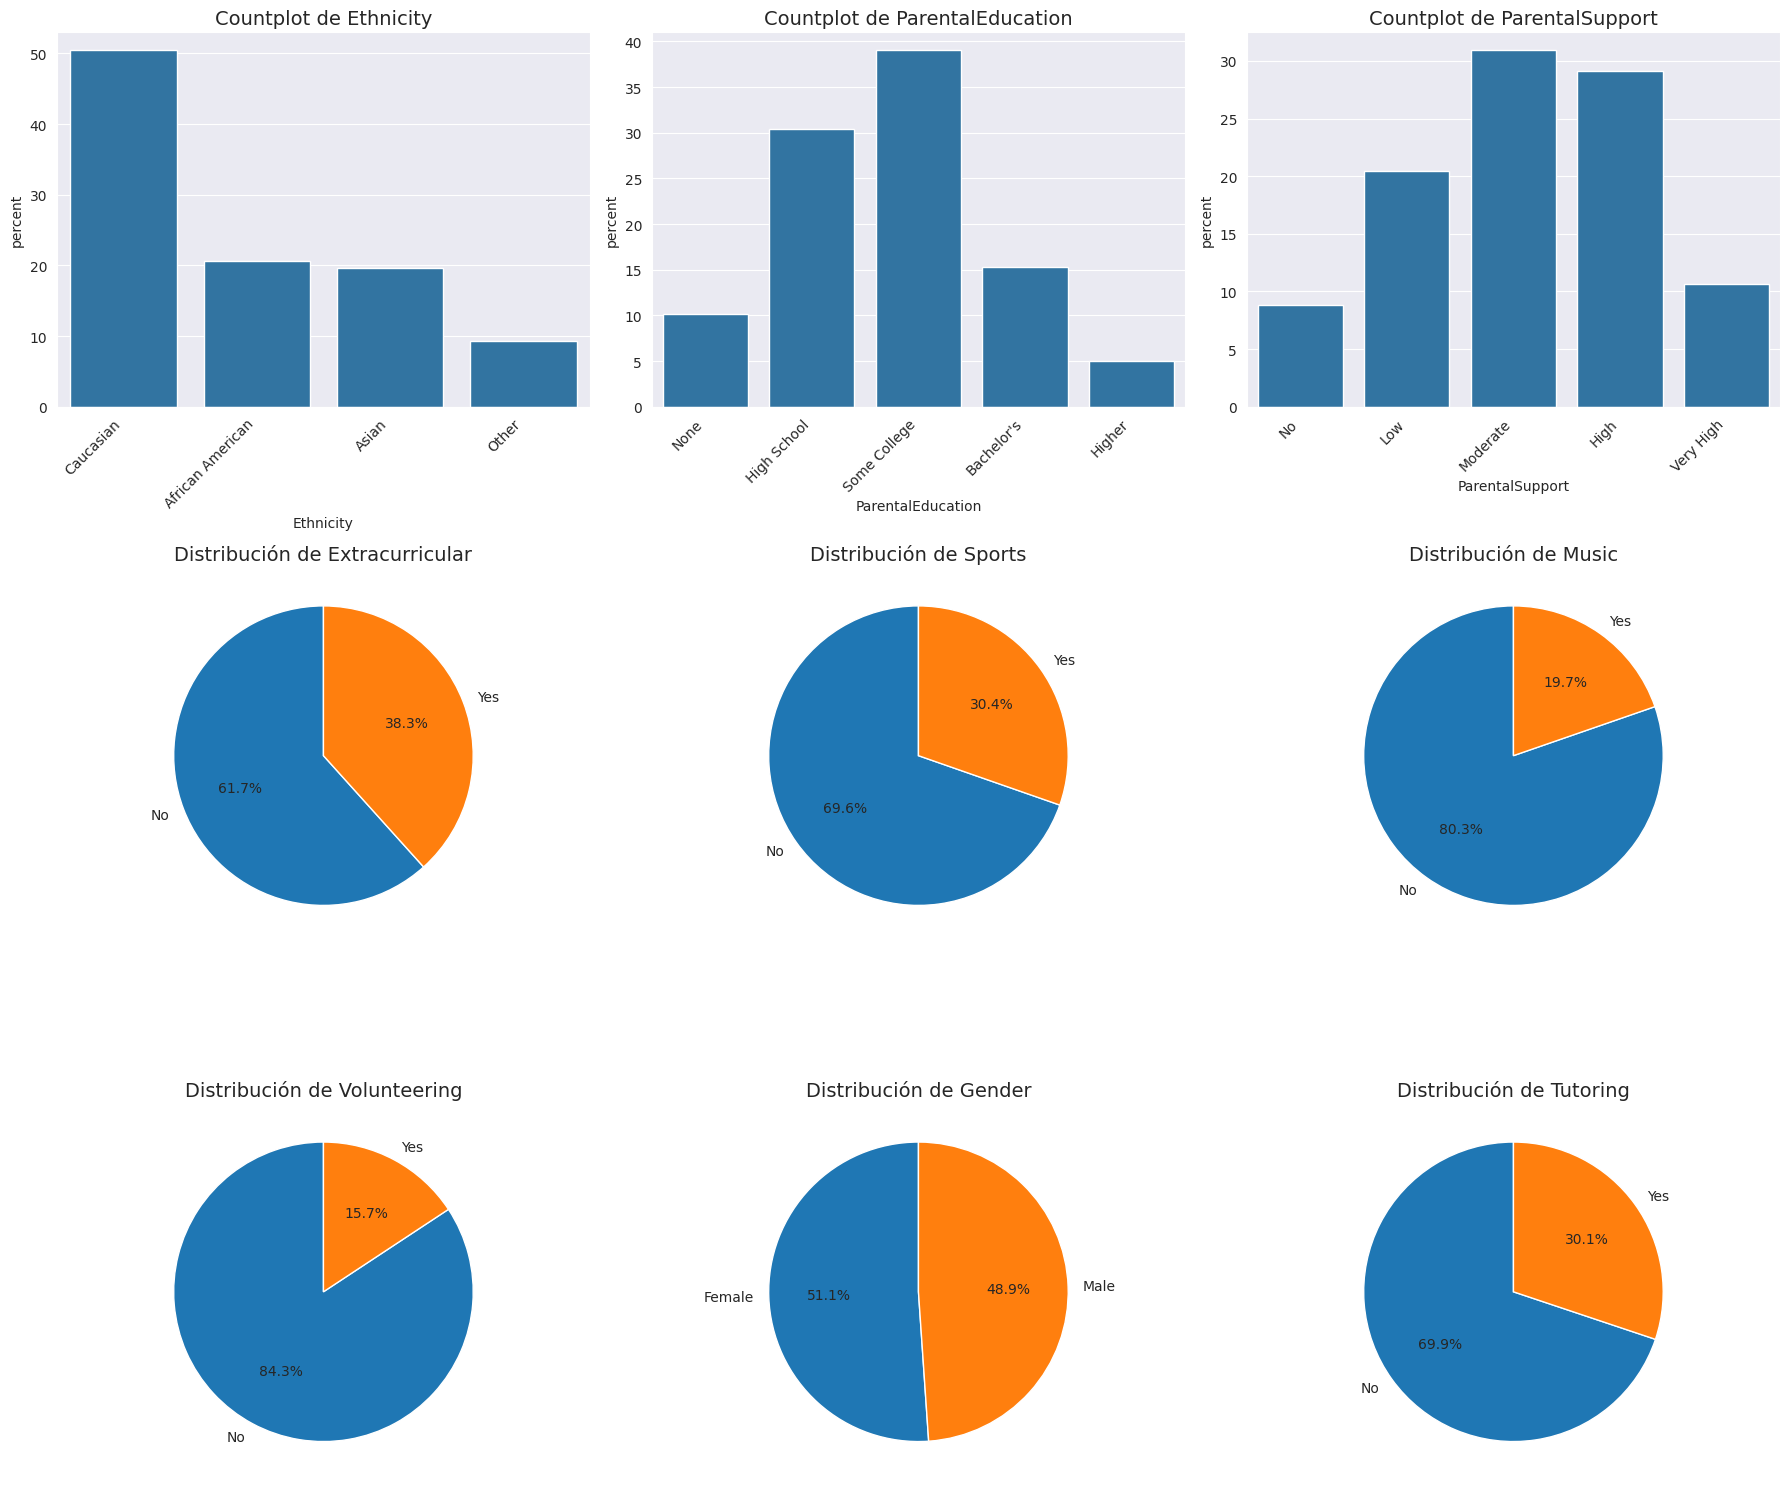

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, column in enumerate(CatVar[:3]):
    row = i // 3  #aca con l ayuda de gemini e internet porque no podia hacer la cuadricula junto con el for.
    col = i % 3
    sns.countplot(data=df, x=column, stat='percent', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot de {column}', fontsize=14)
    labels = Etiquetas.get(column, [])
    ticks = range(len(labels))
    axes[row, col].set_xticks(ticks)
    axes[row, col].set_xticklabels(labels, rotation=45, ha='right')

for i, column in enumerate(BinVar):
    row = (i + 3) // 3
    col = (i + 3) % 3
    frecuencias = df[column].value_counts()
    axes[row, col].pie(frecuencias, labels=Etiquetas.get(column, []), autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Distribución de {column}', fontsize=14)

plt.tight_layout()
plt.show()

Respecto al ámbito familiar de los almunos, la mayoria de los padres han terminado la secundaria o han comenzado la universidad, mientras que en cuanto al apoyo que brindan a nivel escolar la mayoria es de moderado a alto.

La etnicidad mayor representada es la caucásica.

La gran mayoria de los alumnos no participa de ninguna actividad extracurricular, ni en musica o deportes.

La variable género se encuentra balanceada. Mientras que el resto presenta un desbalance alto.

### Distribución de la Variable Target

In [35]:
#Exploremos la variable target
print(df['GradeClass'].describe())

count   2392.00
mean       2.98
std        1.23
min        0.00
25%        2.00
50%        4.00
75%        4.00
max        4.00
Name: GradeClass, dtype: float64


DescribeResult(nobs=2392, minmax=(0.0, 4.0), mean=2.983695652173913, variance=1.522527867183096, skewness=-0.900242251313216, kurtosis=-0.4182476631355172)

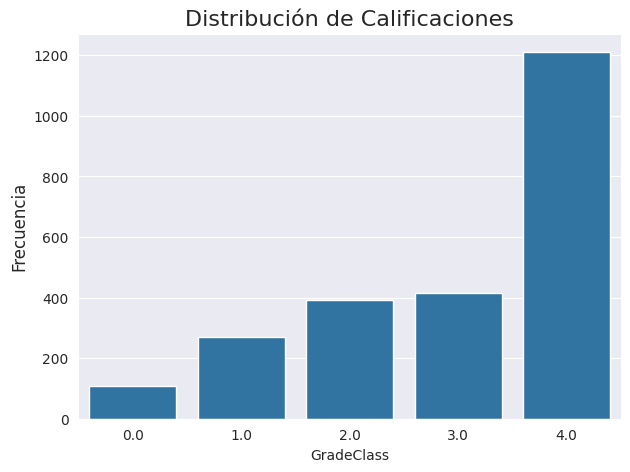

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.countplot(df, x='GradeClass',stat="count")
plt.title('Distribución de Calificaciones', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
stats.describe(df.GradeClass)

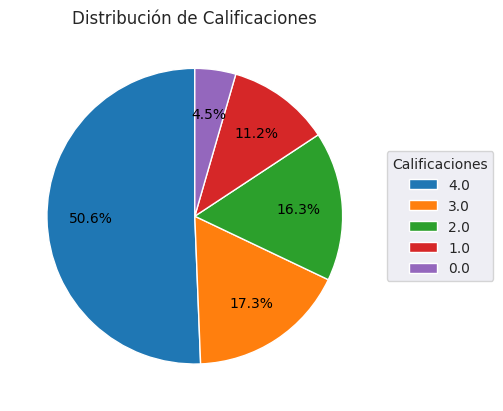

In [37]:
conteo_calificaciones = df['GradeClass'].value_counts()
plt.pie(conteo_calificaciones, labels=None, autopct='%1.1f%%', startangle=90,
        pctdistance=0.7, textprops={'fontsize': 10, 'color': 'black'})
plt.title('Distribución de Calificaciones')
plt.legend(conteo_calificaciones.index, title='Calificaciones', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que el 50% de los alumnos obtienen la clasificación más baja, mientras que el resto de las notas se asignan a menos del 20% de los alumnos cada una. Solo un 5% obtiene las mejores clasificaciones (0).
Podemos decir que la variable target no posee distribución normal, y presenta asimetría moderada (-0.90) a alta hacia la izquierda o negativa.

In [38]:
# Realizo el test de Shapiro para evaluar normalidad en la variable respuesta
p_value = stats.shapiro(df.GradeClass)

print("Valor p:", p_value[1])
nivel_significancia = 0.05
if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 9.429434016975867e-49
Los datos no siguen una distribución normal.


## Análisis Bivariado

###Evaluamos la correlacion de las variables vs la variable target

Correlaciones con coeficiente Pearson GradeClass         1.00
Absences           0.73
StudyTimeWeekly   -0.13
Age               -0.01
Name: GradeClass, dtype: float64
--------------------------------------------------
Correlaciones con coeficiente Spearman GradeClass         1.00
Absences           0.77
StudyTimeWeekly   -0.13
Age               -0.01
Name: GradeClass, dtype: float64


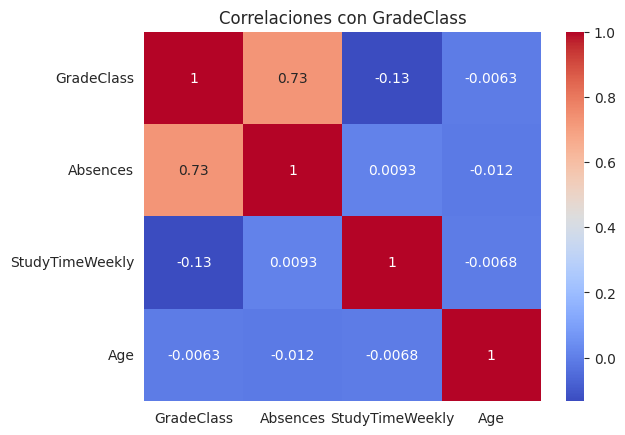

In [39]:
corPearson = df[['GradeClass', 'Absences', 'StudyTimeWeekly','Age']].corr()
corSpearman = df[['GradeClass', 'Absences', 'StudyTimeWeekly','Age']].corr(method='spearman')
print("Correlaciones con coeficiente Pearson", corPearson['GradeClass'].round(2))
print("-" * 50)
print("Correlaciones con coeficiente Spearman",corSpearman['GradeClass'].round(2))


# mapa de calor
sns.heatmap(corPearson, annot=True, cmap='coolwarm')
plt.title('Correlaciones con GradeClass')
plt.show()

Podemos observar una alta correlación entre la calificación obtenida y la cantidad de días ausentes (0.73).
Las correlacionde de GradeClass con el resto de variables cuantitativas son bajas.
Si probamos con el coeficiente de Spearman, vemos que ese valor es levemente mayor. Podrá ser una relación no lineal entre esta variable y la variable target.

In [40]:
#Probamos esa correlación con otra librería para obtener también un nivel de significancia.
coeficiente, p_valor = stats.spearmanr(df["GradeClass"], df["Absences"])

# Imprimir el coeficiente de Spearman y el p-valor
print("Coeficiente de Spearman:", coeficiente)
print("P-valor: {:.15f}".format(p_valor))  # Imprime con más decimales


Coeficiente de Spearman: 0.7682788659905345
P-valor: 0.000000000000000


El valor p es menor a 0.05, rechazamos la hipótesis nula y podemos decir que existe una correlación significativa.

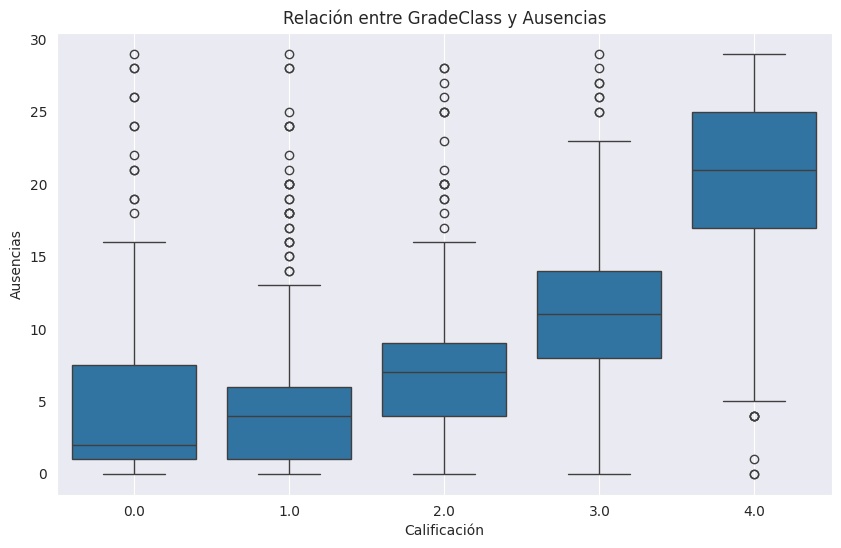

In [41]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(x='GradeClass', y='Absences', data=df, ax=axes)
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Ausencias')
plt.title('Relación entre GradeClass y Ausencias')
plt.show()

Acá podemos observar como los alumnos con calificaciones más bajas (4) en general son quienes más días se ausentan.

In [42]:
# Calcular el coeficiente de correlación para las variables binarias vs target con el coef. punto biserial
for variable in BinVar:
    coeficiente, p_valor = pointbiserialr(df[variable], df['GradeClass'])
    print(f"Correlación entre {variable} y GradeClass:")
    print(f"Coeficiente: {coeficiente:.2f}")
    print(f"Valor p: {p_valor:.3f}")
    print("-" * 30)

Correlación entre Extracurricular y GradeClass:
Coeficiente: -0.07
Valor p: 0.001
------------------------------
Correlación entre Sports y GradeClass:
Coeficiente: -0.03
Valor p: 0.193
------------------------------
Correlación entre Music y GradeClass:
Coeficiente: -0.04
Valor p: 0.078
------------------------------
Correlación entre Volunteering y GradeClass:
Coeficiente: 0.01
Valor p: 0.520
------------------------------
Correlación entre Gender y GradeClass:
Coeficiente: 0.02
Valor p: 0.261
------------------------------
Correlación entre Tutoring y GradeClass:
Coeficiente: -0.11
Valor p: 0.000
------------------------------


Mediante este coeficiente podemos evaluar que no existe correlación entre nuestra variable target y las variables binarias del dataset.
Podemos explorar si hay alguna relación entre estas y las ausencias por ejemplo, que si se correlacionaban con la variable target.

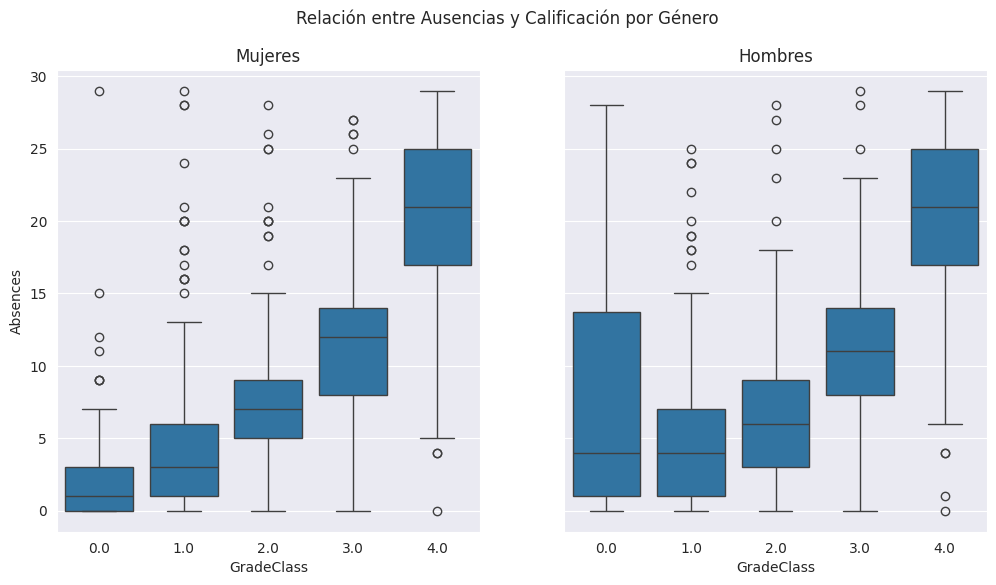

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxplot(x='GradeClass', y='Absences', data=df[df['Gender'] == 1], ax=axes[0])
axes[0].set_title('Mujeres')

sns.boxplot(x='GradeClass', y='Absences', data=df[df['Gender'] == 0], ax=axes[1])
axes[1].set_title('Hombres')

plt.suptitle('Relación entre Ausencias y Calificación por Género')
plt.show()

En este gráfico podemos observar la relación entre las calificaciones obtenidad y las ausencias, diferenciado por género.

Si bien para ambos siguen el mismo patrón, hay una leve diferencia en la mediana para los hombres con mejores calificaciones, que parecen tener más ausencias pero logran buenas calificaciones de igual manera.

<Figure size 700x500 with 0 Axes>

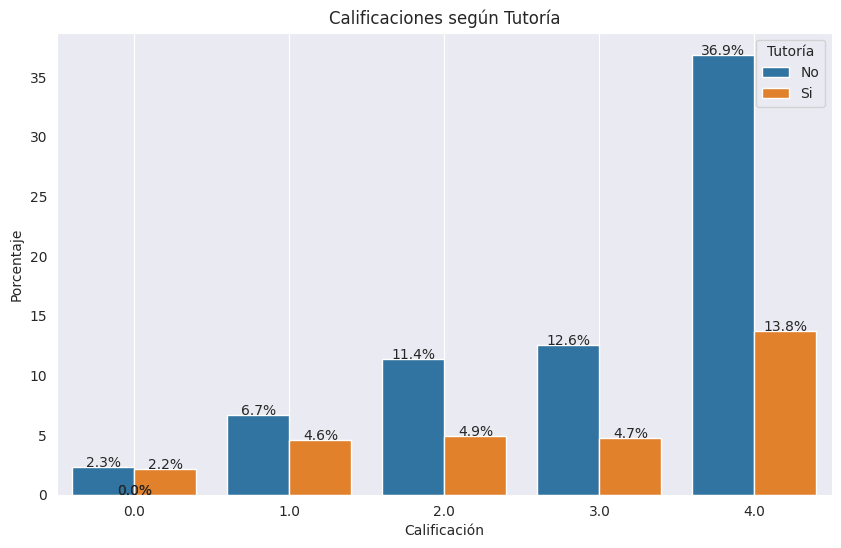

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.countplot(df, x='GradeClass', hue='Tutoring', stat="percent", hue_order=[0, 1])
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Porcentaje')
plt.title('Calificaciones según Tutoría')
plt.legend(title='Tutoría', labels=['No', 'Si'])

# Agregar valores encima de cada barra con ayuda gemini
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            '{:.1f}%'.format(height), ha="center")

plt.show()

Podemos observar que gran porcentaje de los alumnos con calificaciones más bajas no recibe tutoría, indicando la importancia de esta práctica para el rendimiento académico.

**DUDA** Acá nose como comparar si esas diferencias son significativas.

###Evaluamos las relaciones entre las demás variables.

<Figure size 700x500 with 0 Axes>

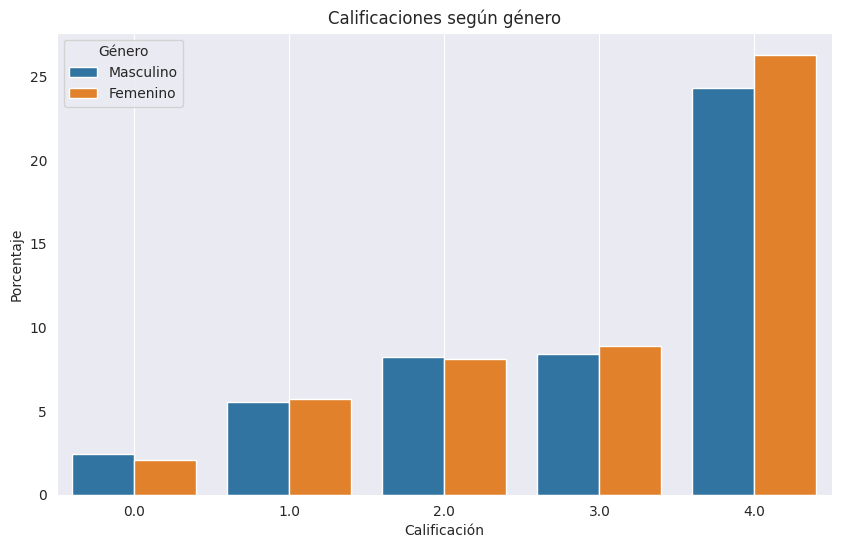

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(df, x='GradeClass', hue='Gender', stat="percent", hue_order=[0, 1])
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Porcentaje')
plt.title('Calificaciones según género')
plt.legend(title='Género', labels=['Masculino', 'Femenino'])
plt.show()

In [46]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df['GradeClass'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Valor de chi-cuadrado: 1.9153728454653411
Valor p: 0.7513204328843887


No se evidencia relación gráfica o estadística entre las calificaciones obtenidas por los alumnos y su género.

In [47]:
#Para las demás variables con ayuda de gemini

from scipy.stats import ttest_ind, mannwhitneyu

for variable in BinVar:
    grupo_0 = df[df[variable] == 0]['Absences']
    grupo_1 = df[df[variable] == 1]['Absences']

    # Prueba t de Student (asumiendo normalidad)
    t_statistic, p_value_t = ttest_ind(grupo_0, grupo_1)
    print(f"Prueba t para la variable {variable}:")
    print(f"Estadística t: {t_statistic:.2f}")
    print(f"Valor p: {p_value_t:.3f}")

Prueba t para la variable Extracurricular:
Estadística t: -0.02
Valor p: 0.986
Prueba t para la variable Sports:
Estadística t: -2.03
Valor p: 0.043
Prueba t para la variable Music:
Estadística t: 0.42
Valor p: 0.671
Prueba t para la variable Volunteering:
Estadística t: 0.91
Valor p: 0.365
Prueba t para la variable Gender:
Estadística t: -1.05
Valor p: 0.294
Prueba t para la variable Tutoring:
Estadística t: 0.76
Valor p: 0.448


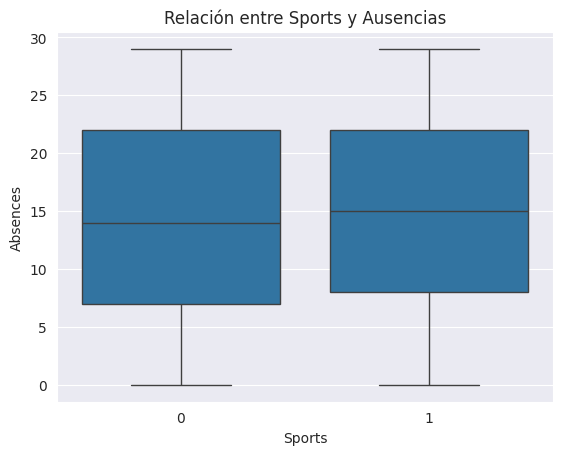

In [48]:
    plt.figure()
    sns.boxplot(x='Sports', y='Absences', data=df)
    plt.title(f"Relación entre Sports y Ausencias")
    plt.show()

Observamos que habría una leve diferencia entre la cantidad de ausencias para quienes realizan deportes vs los que no.
Podemos evaluarlo comparando las medias mediante el estadístico t de Student, previo chequeo de normalidad.


In [49]:
# Realizar la prueba de normalidad Shapiro-Wilk
estadistico, p_valor = stats.shapiro(df[df[variable] == 0]['Absences'])

# Imprimir el estadístico de la prueba y el p-valor
print("Estadístico de la prueba:", estadistico)
print("P-valor:", p_valor)

Estadístico de la prueba: 0.9547667863071984
P-valor: 2.469389942590358e-22


No procedo a evaluar la diferencia entre las medias dado que no se cumple el supuesto de normalidad.

#Conclusiones EDA - Primera Preentrega

En el análisis univariado observamos que la edad se encuentra balanceada con casi la misma cantidad de alumanos de 15 a 18 años, y que el tiempo de estudio y la asistencia a clase presentan distribuciones uniformes.

La etnicidad más representada es la caucásica.

Por otro lado, de las variables categóricas, el género más frecuente es el femenino, aunque está variabla se encuentra balanceada; no así el resto.

Los alumnos la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.

En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.

Respecto de la distribución de las calificaciones, se exploró la variable GradeClass y se observó que la mayoría de los estudiantes obtienen calificaciones bajas. Esto podría indicar la necesidad de investigar las causas de este bajo rendimiento y diseñar estrategias para mejorar el aprendizaje.

Además, en la exploración bivariadas la única variable que presento una alta correlación con nuestra variable target fue las ausencias a clases, asociando mayor ausencias con calificaciones más bajas. Mientras que las correlaciones con el resto de las variables fueron bajas.

También podemos observar algún tipo de relación de nuestra variable target y la presencia de tutorías, con mayor importancia en aquellso alumnos con bajas calificaciones.

Esta primera exploración no da una idea de las variables que resultan de interés al momento de modelar y clasificar el desempeño de los estudiantes, entre ellas la ausencia a clases y la presencia de tutoria.





#Data wrangling

Nota: Si corro todas las celdas juntas, no se binariza el target de manera correcta.

In [50]:
#Binarizo la variable target en 'Approved' (1) y 'Not approved' (0)
df.GradeClass = df.GradeClass.replace({0:1, 1:1, 2:1, 3:1, 4:0}).astype(int)


In [51]:
df['GradeClass'].value_counts()

,count
GradeClass,
0,1211
1,1181


Vemos que ambas clases (aprobados y no aprobados) se encuentran balanceadas.

In [52]:
# Separo la variable target del resto de los datos
x= df.drop(columns=['GradeClass'])
y= df['GradeClass']

In [53]:
#Encodeo con dummies las variables con mas de dos categorías
for col in ['Ethnicity', 'ParentalSupport', 'ParentalEducation']:
  x[col] = x[col].astype('category')
print(x.dtypes)

Age                     int64
Gender                  int64
Ethnicity            category
ParentalEducation    category
StudyTimeWeekly       float64
Absences                int64
Tutoring                int64
ParentalSupport      category
Extracurricular         int64
Sports                  int64
Music                   int64
Volunteering            int64
dtype: object


In [54]:
x_new=pd.get_dummies(x,drop_first=True)
x_new.head()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
StudentID,,,,,,,,,,,,,,,,,,,,
1001,17,1,19.83,7,1,0,0,1,0,False,False,False,False,True,False,False,False,True,False,False
1002,18,0,15.41,0,0,0,0,0,0,False,False,False,True,False,False,False,True,False,False,False
1003,15,0,4.21,26,0,0,0,0,0,False,True,False,False,False,True,False,False,True,False,False
1004,17,1,10.03,14,0,1,0,0,0,False,False,False,False,False,True,False,False,False,True,False
1005,17,1,4.67,17,1,0,0,0,0,False,False,False,False,True,False,False,False,False,True,False


In [55]:
# Escalo mis variables numericas

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_new[['Age']] = mm.fit_transform(df[['Age']])
x_new[['StudyTimeWeeklyge']] = mm.fit_transform(df[['StudyTimeWeekly']])
x_new[['Absences']] = mm.fit_transform(df[['Absences']])


In [56]:
x_new.head()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_1,...,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,StudyTimeWeeklyge
StudentID,,,,,,,,,,,,,,,,,,,,,
1001,0.67,1,19.83,0.24,1,0,0,1,0,False,...,False,False,True,False,False,False,True,False,False,0.99
1002,1.00,0,15.41,0.00,0,0,0,0,0,False,...,False,True,False,False,False,True,False,False,False,0.77
1003,0.00,0,4.21,0.90,0,0,0,0,0,False,...,False,False,False,True,False,False,True,False,False,0.21
1004,0.67,1,10.03,0.48,0,1,0,0,0,False,...,False,False,False,True,False,False,False,True,False,0.50
1005,0.67,1,4.67,0.59,1,0,0,0,0,False,...,False,False,True,False,False,False,False,True,False,0.23


#1° Iteración
Probamos algunos modelos sin setear ni modificar hiperparámetros utilizando validación simple

In [57]:
#Separo mi dataset para entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42, stratify=y)

## KNN

In [58]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
knn.fit(X_train, y_train)

# Obtenemos las predicciones del modelo
preds_train_knn = knn.predict(X_train)
preds_knn = knn.predict(X_test)

Accuracy sobre el set de entrenamiento: 0.8100358422939068 

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       847
           1       0.81      0.80      0.81       827

    accuracy                           0.81      1674
   macro avg       0.81      0.81      0.81      1674
weighted avg       0.81      0.81      0.81      1674



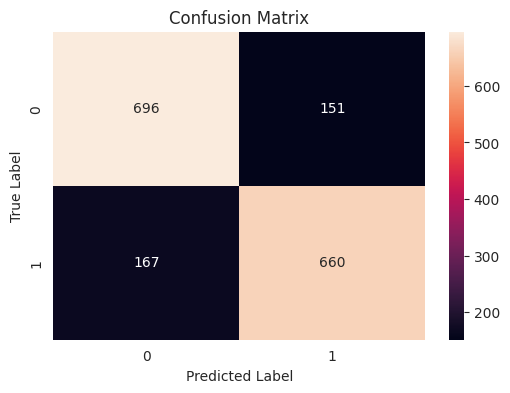

Accuracy sobre el set de testeo: 0.5821727019498607 

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       364
           1       0.57      0.59      0.58       354

    accuracy                           0.58       718
   macro avg       0.58      0.58      0.58       718
weighted avg       0.58      0.58      0.58       718



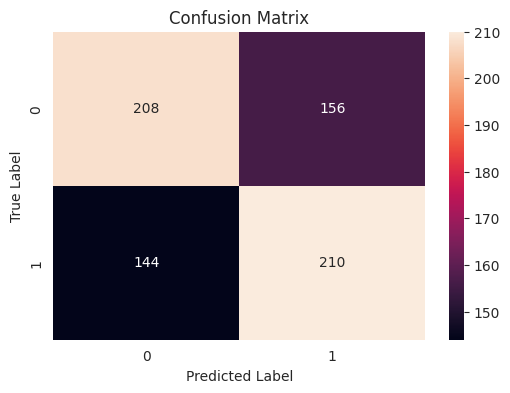

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_knn)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_knn))
#---------------------------------------------------
# Creando la matriz de confusión
cm_tr = confusion_matrix(y_train, preds_train_knn)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tr, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_knn)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_knn))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test= confusion_matrix(y_test, preds_knn)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

Se puede observar que si bien en entrenamiento se obtienen valores de accuracy (en este caso la variable target estaba balanceada), precision y recall cercanos a 0.8, en testeo la performance del modelo disminuye casi a 0.6.
En ambos casos los valores de falsos positivos y negativos son altos, dando como aprobados a alumnos que no y viceversa.

##KNN modificando el dataset
Probamos sacando variables que ya observamos que serían menos importantes al momento de determinar la caliicación final.

Nos quedamos con el tiempo de estudio, las ausencias y el nivel de apoyo de los padres.

In [60]:
x_dos=x_new.drop(columns=['Age','Gender','Tutoring','Extracurricular','Sports','Music','Volunteering','Ethnicity_1','Ethnicity_2','Ethnicity_3','ParentalEducation_1','ParentalEducation_2','ParentalEducation_3','ParentalEducation_4'])
x_dos.head()

,StudyTimeWeekly,Absences,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,StudyTimeWeeklyge
StudentID,,,,,,,
1001,19.83,0.24,False,True,False,False,0.99
1002,15.41,0.00,True,False,False,False,0.77
1003,4.21,0.90,False,True,False,False,0.21
1004,10.03,0.48,False,False,True,False,0.50
1005,4.67,0.59,False,False,True,False,0.23


Accuracy sobre el set de entrenamiento: 0.9050179211469535 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       854
           1       0.91      0.89      0.90       820

    accuracy                           0.91      1674
   macro avg       0.91      0.90      0.90      1674
weighted avg       0.91      0.91      0.90      1674



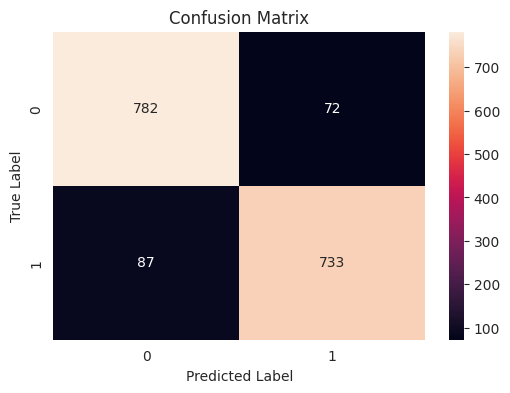

Accuracy sobre el set de testeo: 0.8481894150417827 

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       357
           1       0.87      0.82      0.84       361

    accuracy                           0.85       718
   macro avg       0.85      0.85      0.85       718
weighted avg       0.85      0.85      0.85       718



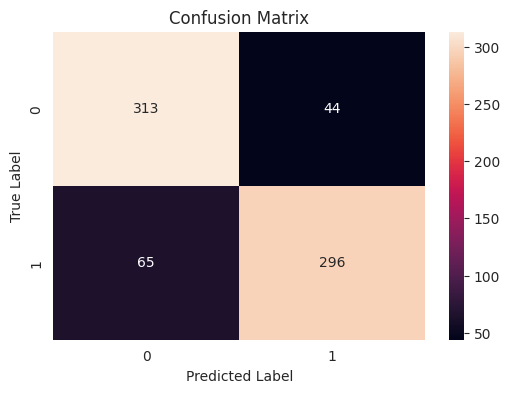

In [61]:
#Separo mi dataset para entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train_dos, X_test_dos, y_train_dos, y_test_dos = train_test_split(x_dos, y, test_size=0.3, random_state=42)
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
knn_sub = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
knn_sub.fit(X_train_dos, y_train_dos)

# Obtenemos las predicciones del modelo
preds_train_knn_sub = knn_sub.predict(X_train_dos)
preds_knn_sub = knn_sub.predict(X_test_dos)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train_dos, preds_train_knn_sub)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train_dos, preds_train_knn_sub))
#---------------------------------------------------
# Creando la matriz de confusión
cm_tr = confusion_matrix(y_train_dos, preds_train_knn_sub)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tr, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test_dos, preds_knn_sub)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test_dos, preds_knn_sub))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test= confusion_matrix(y_test_dos, preds_knn_sub)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

Vemos como de esta forma mejora bastante los falsos negativos y falsos positivos.

##Decision Tree (árbol de decisión)

Accuracy sobre el set de entrenamiento: 0.8894862604540024 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       847
           1       0.90      0.88      0.89       827

    accuracy                           0.89      1674
   macro avg       0.89      0.89      0.89      1674
weighted avg       0.89      0.89      0.89      1674



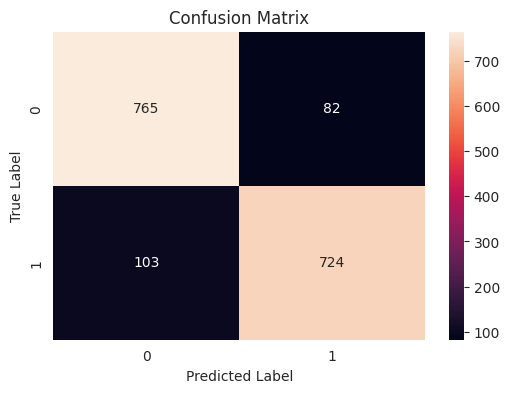

Accuracy sobre el set de testeo: 0.8662952646239555 

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       364
           1       0.89      0.83      0.86       354

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



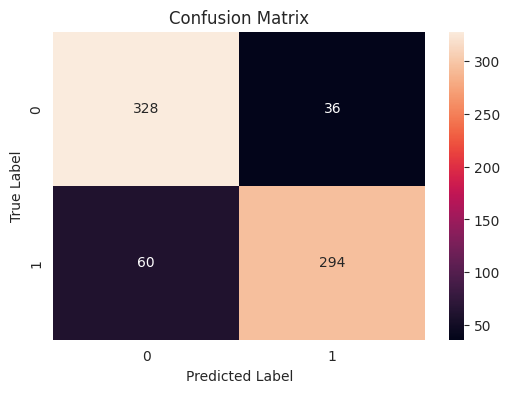

In [68]:
# Entrenar el arbol
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=25, min_samples_leaf=10)
dtc = dtc.fit(X_train, y_train)

# Obtenemos las predicciones del modelo
preds_dtc = dtc.predict(X_test)
preds_train_dtc = dtc.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_dtc)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_dtc))
#---------------------------------------------------
# Creando la matriz de confusión
cm_train_tree = confusion_matrix(y_train, preds_train_dtc)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_tree, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_dtc)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_dtc))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test_tree= confusion_matrix(y_test, preds_dtc)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_tree, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

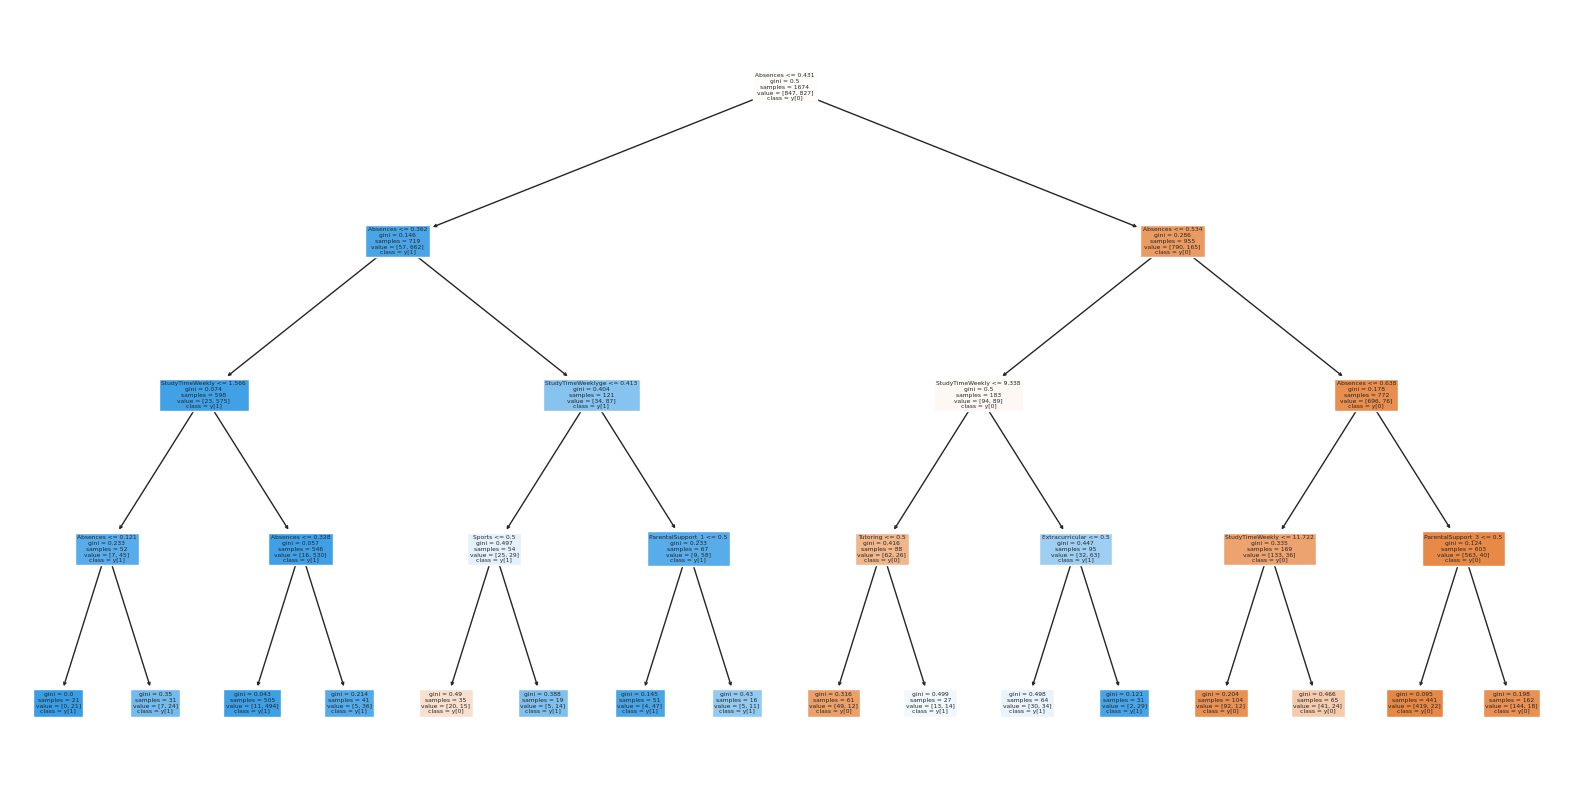

In [69]:
# Gráfico
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dtc,feature_names=X_train.columns,
                   class_names=True,
                   filled=True)

In [70]:
importances = dtc.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Variable,Importance
3,Absences,0.93
2,StudyTimeWeekly,0.03
5,Extracurricular,0.01
20,StudyTimeWeeklyge,0.01
4,Tutoring,0.01
6,Sports,0.00
16,ParentalSupport_1,0.00
18,ParentalSupport_3,0.00
13,ParentalEducation_2,0.00
19,ParentalSupport_4,0.00


Esto concuerda con lo que vimos en el EDA con el heatmap donde las ausencias a clases representaban la veriable más importante al momento de determinar la calificación de un alumno.
La performance del modelo podría mejorarse. No cambia cuando reduzco el dataset como en knn.

## Random forest (Ensamble Bagging)

Accuracy sobre el set de entrenamiento: 0.9127837514934289 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       847
           1       0.93      0.89      0.91       827

    accuracy                           0.91      1674
   macro avg       0.91      0.91      0.91      1674
weighted avg       0.91      0.91      0.91      1674



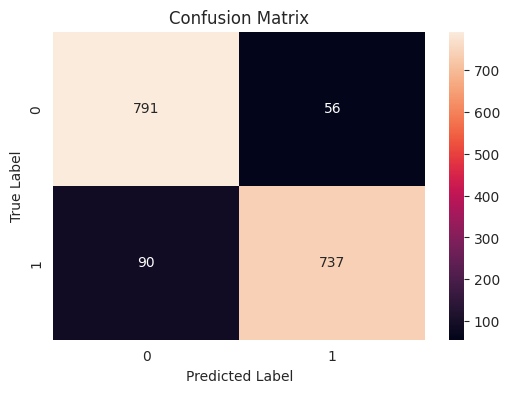

Accuracy sobre el set de testeo: 0.8816155988857939 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       364
           1       0.90      0.86      0.88       354

    accuracy                           0.88       718
   macro avg       0.88      0.88      0.88       718
weighted avg       0.88      0.88      0.88       718



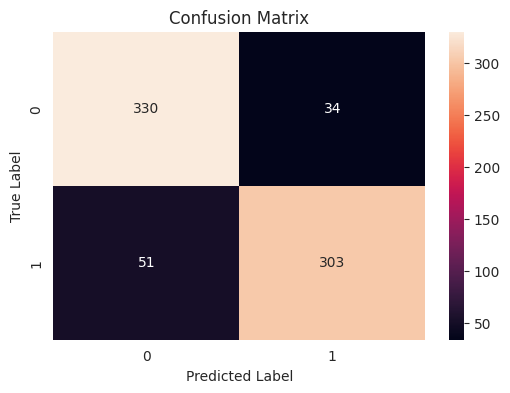

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el arbol
rf = RandomForestClassifier(max_depth=6, n_estimators=100)
rf.fit(X_train, y_train)

# Obtenemos las predicciones del modelo
preds_rf = rf.predict(X_test)
preds_train_rf = rf.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_rf)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_rf))
#---------------------------------------------------
# Creando la matriz de confusión
cm_train_rf = confusion_matrix(y_train, preds_train_rf)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_rf, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_rf)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_rf))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test_rf= confusion_matrix(y_test, preds_rf)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

In [72]:
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Variable,Importance
3,Absences,0.77
2,StudyTimeWeekly,0.06
20,StudyTimeWeeklyge,0.06
0,Age,0.02
4,Tutoring,0.01
18,ParentalSupport_3,0.01
9,Ethnicity_1,0.01
5,Extracurricular,0.01
1,Gender,0.01
6,Sports,0.01


## Resumen de métricas en testeo

In [73]:
print('Reporte de Knn')
print(metrics.classification_report(y_test, preds_knn),'\n')
print('Reporte de Knn reducido')
print(metrics.classification_report(y_test_dos, preds_knn_sub),'\n')
print('Reporte de Árbol de Decisión')
print(metrics.classification_report(y_test, preds_dtc),'\n')
print('Reporte de Random Forest')
print(metrics.classification_report(y_test, preds_rf),'\n')

Reporte de Knn
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       364
           1       0.57      0.59      0.58       354

    accuracy                           0.58       718
   macro avg       0.58      0.58      0.58       718
weighted avg       0.58      0.58      0.58       718
 

Reporte de Knn reducido
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       357
           1       0.87      0.82      0.84       361

    accuracy                           0.85       718
   macro avg       0.85      0.85      0.85       718
weighted avg       0.85      0.85      0.85       718
 

Reporte de Árbol de Decisión
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       364
           1       0.89      0.83      0.86       354

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
we

Podemos observar que respecto al accuracy (en este caso las clases están balanceadas) va mejorando respecto avanzamos en los sucesivos modelos, manteniendose igual en los árboles de decision y random forest, lo cual tiene sentido debido a la conformación de los modelos.
El F1 Score tambien aumenta progresivamente aunque sin tanta diferencia en los ultimos tres modelos. Esta métrica sería de interés dado que observo que el punto débil en este caso de estudio es clasificar estudiantes como aprobados cuando no se dan las condiciones así como tambien la situación opuesta. En el caso de tener que priorizar mejorar sólo un aspecto, sería reducir los falsos positivos (dar por aprobados alumnos que no cumplirían dicha condición), por ende lograr mejorar la presición.
Finalmente, evaluando la importancia de las variables en los modelos Random forest y Arbol de decisión, podría trabajarse directamente con un dataset reducido, es decir, sin las variables que no tienen peso.
Se probó reducir el dataset a solo las variables de mayor importancia y probar el rendimiento del modelo, corresponde al modelo kkn_sub.

DUDA: la importancia con feature_importances_ da bastante diferente que con permutation_importance. Entiendo que el método mediante el cual se calcula es distinto, pero la duda sería que criterio seguir para seleccionar las variables y reducir el dataset solo a las que serían de importancia.

#2° Iteración - Optimización - Búsqueda de hiperparámetros con GridSearch y validación cruzada con y Stritified K-Fold

In [74]:
#Dependencias
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

In [75]:
#Separo mi dataset para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

## KNN GS

In [76]:
knn_gs = KNeighborsClassifier()

hiperparametros={'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_gs_grilla=GridSearchCV(knn_gs,hiperparametros, cv=S_kfold,scoring='f1',n_jobs=-1,verbose=3)
knn_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1', verbose=3)

In [77]:
knn_gs_grilla.best_params_

{'n_neighbors': 9}

In [78]:
knn_gs_grilla.best_score_

0.6319830005915635

In [ ]:
knn_gs = KNeighborsClassifier()
hiperparametros={'n_neighbors':[7,9,11]}
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_gs_grilla=GridSearchCV(knn_gs,hiperparametros, cv=S_kfold,scoring='f1',n_jobs=-1,verbose=3)
knn_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [7, 9, 11]}, scoring='f1', verbose=3)

Probando un número de vecinos cercano al óptimo obtenemos los mismos resultados. Nos quedamos con 9 vecinos del modelo knn_gs_grilla.

Accuracy sobre el set de entrenamiento: 0.7508960573476703 

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       854
           1       0.76      0.71      0.74       820

    accuracy                           0.75      1674
   macro avg       0.75      0.75      0.75      1674
weighted avg       0.75      0.75      0.75      1674



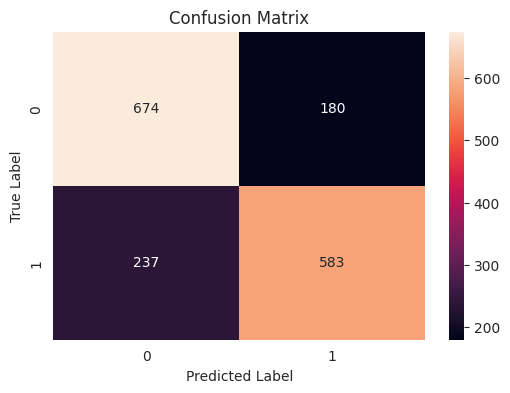

Accuracy sobre el set de testeo: 0.6225626740947076 

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       357
           1       0.63      0.61      0.62       361

    accuracy                           0.62       718
   macro avg       0.62      0.62      0.62       718
weighted avg       0.62      0.62      0.62       718



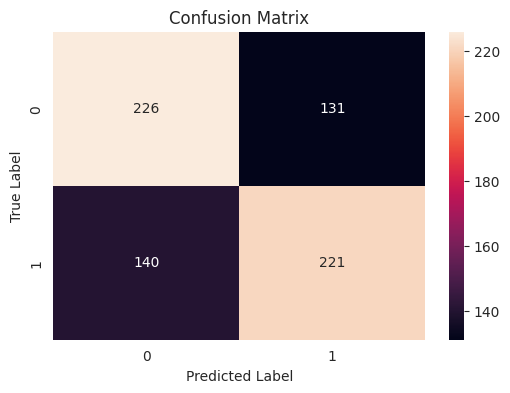

In [79]:
# Entreno el mejor modelo
modelo_knn_gs=knn_gs_grilla.best_estimator_
modelo_knn_gs.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_knn_gs= modelo_knn_gs.predict(X_test)
preds_train_knn_gs = modelo_knn_gs.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_knn_gs)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_knn_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm = confusion_matrix(y_train, preds_train_knn_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_knn_gs)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_knn_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm= confusion_matrix(y_test, preds_test_knn_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

##Decision Tree GS

In [80]:
dtc = tree.DecisionTreeClassifier()

hiperparametros=[{'max_depth':[4,6,8], 'min_samples_split':[2,10,25],'min_samples_leaf':[1,5,10],'criterion':['gini','entropy']}]

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dtc_gs_grilla=GridSearchCV(dtc,hiperparametros, cv=S_kfold,scoring='f1',n_jobs=-1,verbose=3)
dtc_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 6, 8],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 25]}],
             scoring='f1', verbose=3)

In [81]:
dtc_gs_grilla.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [82]:
dtc_gs_grilla.best_score_

0.8657797784609379

In [83]:
#Probamos opciones de hiperparámetros cercanos al óptimo anterior.
dtc = tree.DecisionTreeClassifier()
hiperparametros=[{'max_depth':[3,4,5], 'min_samples_split':[8,10,12],'min_samples_leaf':[1,2],'criterion':['gini','entropy']}]
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dtc_gs_grilla=GridSearchCV(dtc,hiperparametros, cv=S_kfold,scoring='f1',n_jobs=-1,verbose=3)
dtc_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                          'min_samples_split': [8, 10, 12]}],
             scoring='f1', verbose=3)

Hay pequeñas variaciones, valores muy cercanos a la primer prueba con valores casi exactos de best score. Nos quedamos con el primer modelo. Puede profundizarse con otro tipo de optimización de hiperparámetros

Accuracy sobre el set de entrenamiento: 0.8966547192353644 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       854
           1       0.93      0.85      0.89       820

    accuracy                           0.90      1674
   macro avg       0.90      0.90      0.90      1674
weighted avg       0.90      0.90      0.90      1674



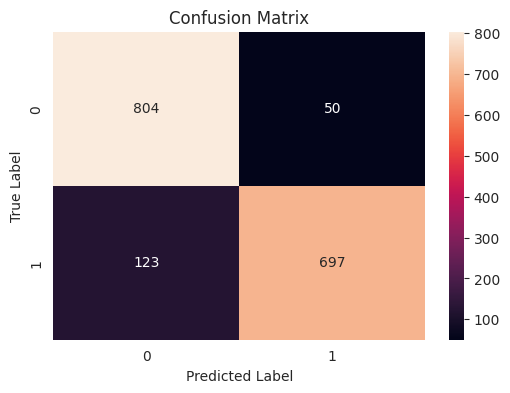

Accuracy sobre el set de testeo: 0.8732590529247911 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       357
           1       0.91      0.83      0.87       361

    accuracy                           0.87       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.88      0.87      0.87       718



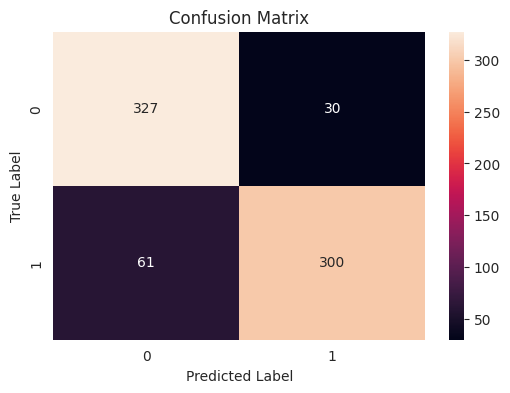

In [84]:
# Entreno el mejor modelo
modelo_dtc_gs=dtc_gs_grilla.best_estimator_
modelo_dtc_gs.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_dtc_gs= modelo_dtc_gs.predict(X_test)
preds_train_dtc_gs = modelo_dtc_gs.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_dtc_gs)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_dtc_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm = confusion_matrix(y_train, preds_train_dtc_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_dtc_gs)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_dtc_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm= confusion_matrix(y_test, preds_test_dtc_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

##Supports Vector Machine GS

In [85]:
svm=SVC()

hiperparametros=[{'C':[1,10,12],'kernel':['linear']},{'gamma':[0.01,0.1], 'C':[1,10],'kernel':['rbf']}]

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_gs_grilla=GridSearchCV(svm,hiperparametros,refit=True, cv=S_kfold,scoring='f1',n_jobs=-1,verbose=3)
svm_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 12], 'kernel': ['linear']},
                         {'C': [1, 10], 'gamma': [0.01, 0.1],
                          'kernel': ['rbf']}],
             scoring='f1', verbose=3)

In [86]:
svm_gs_grilla.best_params_

{'C': 1, 'kernel': 'linear'}

In [87]:
svm_gs_grilla.best_score_

0.8974808795349345

Accuracy sobre el set de entrenamiento: 0.9050179211469535 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       854
           1       0.91      0.90      0.90       820

    accuracy                           0.91      1674
   macro avg       0.91      0.90      0.90      1674
weighted avg       0.91      0.91      0.91      1674



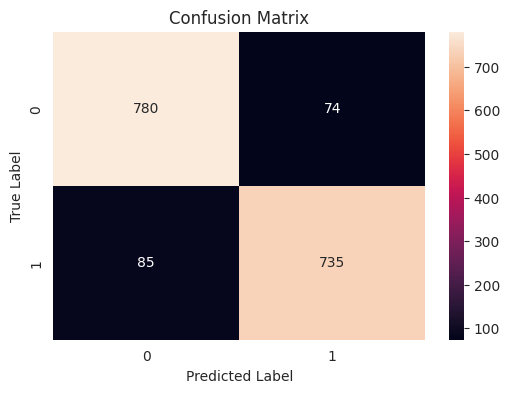

Accuracy sobre el set de testeo: 0.9066852367688022 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       357
           1       0.92      0.90      0.91       361

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
weighted avg       0.91      0.91      0.91       718



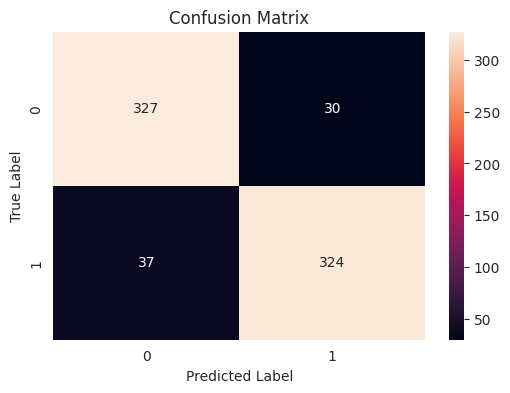

In [88]:
# Entreno el mejor modelo
modelo_svm_gs=svm_gs_grilla.best_estimator_
modelo_svm_gs.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_svm_gs= modelo_svm_gs.predict(X_test)
preds_train_svm_gs = modelo_svm_gs.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_svm_gs)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_svm_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm = confusion_matrix(y_train, preds_train_svm_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_svm_gs)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_svm_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm= confusion_matrix(y_test, preds_test_svm_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

## Random Forest GS

In [89]:
rf_gs = RandomForestClassifier()

hiperparametros={'max_depth':[5,7,9],'min_samples_leaf':[6,5,7], 'max_leaf_nodes':[11,12,13], 'n_estimators':[100,150,170]}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_gs_grilla=GridSearchCV(rf_gs,hiperparametros,cv=S_kfold,scoring='f1', verbose=3,n_jobs=-1)
rf_gs_grilla.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'max_leaf_nodes': [11, 12, 13],
                         'min_samples_leaf': [6, 5, 7],
                         'n_estimators': [100, 150, 170]},
             scoring='f1', verbose=3)

In [90]:
rf_gs_grilla.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 7,
 'n_estimators': 170}

In [91]:
rf_gs_grilla.best_score_

0.88168961200778

Accuracy sobre el set de entrenamiento: 0.9038231780167264 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       854
           1       0.92      0.88      0.90       820

    accuracy                           0.90      1674
   macro avg       0.90      0.90      0.90      1674
weighted avg       0.90      0.90      0.90      1674



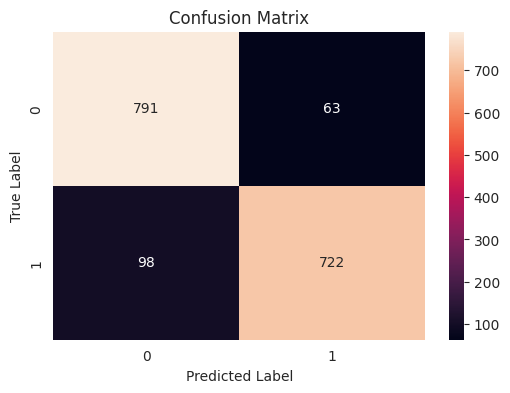

Accuracy sobre el set de testeo: 0.8844011142061281 

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       357
           1       0.90      0.87      0.88       361

    accuracy                           0.88       718
   macro avg       0.88      0.88      0.88       718
weighted avg       0.88      0.88      0.88       718



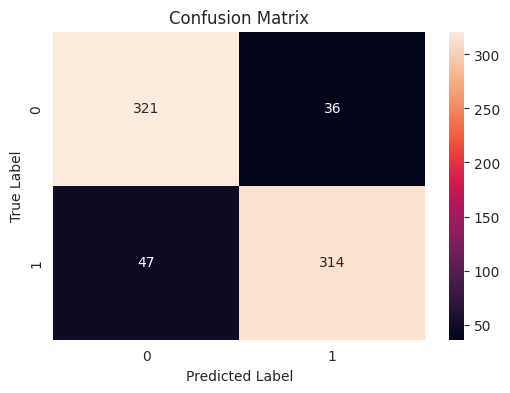

In [92]:
# Entreno el mejor modelo
modelo_rf_gs=rf_gs_grilla.best_estimator_
modelo_rf_gs.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_rf_gs= modelo_rf_gs.predict(X_test)
preds_train_rf_gs = modelo_rf_gs.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_rf_gs)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_rf_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm_train_rf_gs = confusion_matrix(y_train, preds_train_rf_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_rf_gs, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_rf_gs)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_rf_gs))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test_rf_gs= confusion_matrix(y_test, preds_test_rf_gs)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf_gs, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

## Resumen de métricas de testeo utilizando GS

In [93]:
print('Reporte de Knn GS')
print(metrics.classification_report(y_test, preds_test_knn_gs),'\n')
print('Reporte de Árbol de Decisión GS')
print(metrics.classification_report(y_test, preds_test_dtc_gs),'\n')
print('Reporte de SVM GS')
print(metrics.classification_report(y_test, preds_test_svm_gs),'\n')
print('Reporte de Random Forest GS')
print(metrics.classification_report(y_test, preds_test_rf_gs),'\n')

Reporte de Knn GS
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       357
           1       0.63      0.61      0.62       361

    accuracy                           0.62       718
   macro avg       0.62      0.62      0.62       718
weighted avg       0.62      0.62      0.62       718
 

Reporte de Árbol de Decisión GS
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       357
           1       0.91      0.83      0.87       361

    accuracy                           0.87       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.88      0.87      0.87       718
 

Reporte de SVM GS
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       357
           1       0.92      0.90      0.91       361

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
we

A continuación una imagen de las métricas sin optimización

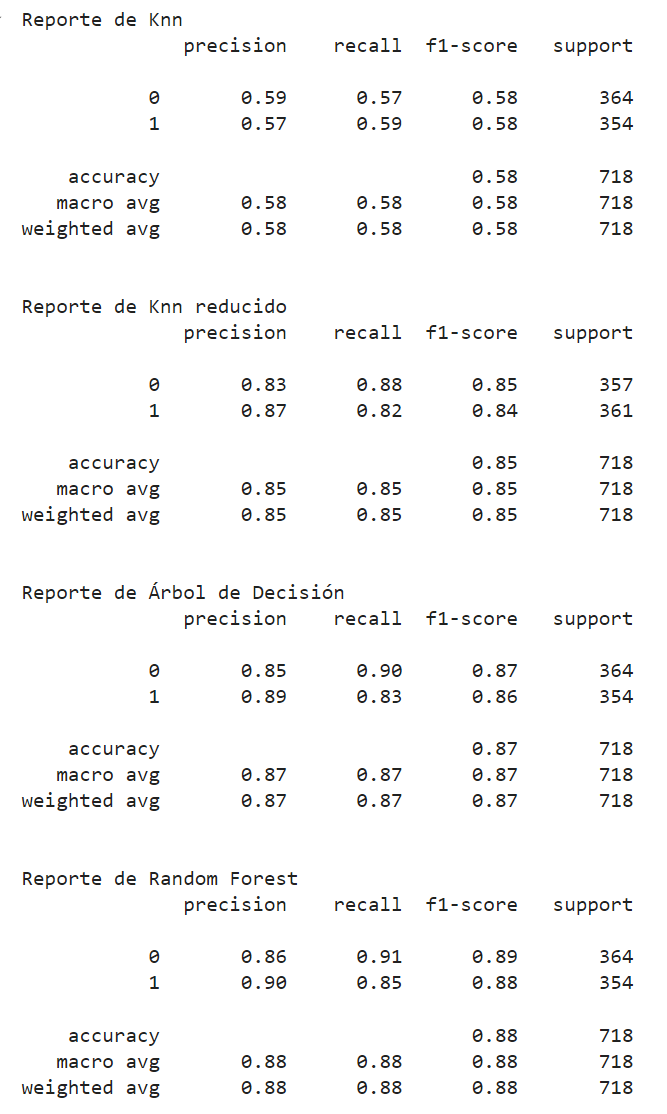

Se utilizó GridSearch para la búsqueda de los mejores hiperparámetros de cada modelo, en conjunto con el método Stratified KFold para validación cruzada manteniendo la proporción de cada clase. Se lograrón leves cambios, no tan significativos.
También se probó un nuevo modelo (Support Vector Machines) el cual logró las mejores métricas.
Vale aclarar que se realizó esta búsqueda optimizando la métrica 'F1-Score' dado que esta métrica sería de interés por que observo que el punto débil en este caso de estudio es clasificar estudiantes como aprobados cuando no se dan las condiciones así como tambien la situación opuesta.
En la siguiente iteración nos quedarmos con dos de los mejores modelos buscando nuevamente optimizar sus hiperparámetros mediante otra metodología.

# 3° Iteración - Segunda Optimización de hiperparámetros mediante HalvingRandomSearchCV y mismo método de CV (StratifiedKFold)

En esta instancia solo trabajaremos sobre los mejores modelos de la segunda iteración probando otro método de optimización de hiperparámetros para evaluar si hay alguna combinación fuera de lo seteado anteriormente.

In [96]:
#Dependencias
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score,roc_curve,roc_auc_score
from sklearn import metrics
from matplotlib import pyplot
import seaborn as sns
sns.set_style('darkgrid')

In [97]:
#Separo mi dataset para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

##Supports Vector Machine HRS

In [98]:
svm=SVC(probability=True)

hiperparametros=[{'C':[1,10,12],'kernel':['linear']},{'gamma':[0.01,0.1], 'C':[1,10],'kernel':['rbf']}]

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_HRS_grilla=HalvingRandomSearchCV(svm,hiperparametros, cv=S_kfold, factor=3,min_resources='exhaust',n_candidates=50,scoring='f1',n_jobs=-1,verbose=3)
svm_HRS_grilla.fit(X_train,y_train)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 558
max_resources_: 1674
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 7
n_resources: 558
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 1
n_candidates: 3
n_resources: 1674
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=SVC(probability=True), min_resources='exhaust',
                      n_candidates=50, n_jobs=-1,
                      param_distributions=[{'C': [1, 10, 12],
                                            'kernel': ['linear']},
                                           {'C': [1, 10], 'gamma': [0.01, 0.1],
                                            'kernel': ['rbf']}],
                      scoring='f1', verbose=3)

In [99]:
print("Mejores parametros: "+str(svm_HRS_grilla.best_params_))
print("Mejor Score: "+str(svm_HRS_grilla.best_score_)+'\n')
print(f'Accuracy del modelo = {round(accuracy_score(y_test, svm_HRS_grilla.predict(X_test)), 3)}')
print(f'F1 Score del modelo = {round(f1_score(y_test, svm_HRS_grilla.predict(X_test)), 3)}')

Mejores parametros: {'kernel': 'linear', 'C': 1}
Mejor Score: 0.8974808795349345

Accuracy del modelo = 0.907
F1 Score del modelo = 0.906


Accuracy sobre el set de entrenamiento: 0.9050179211469535 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       854
           1       0.91      0.90      0.90       820

    accuracy                           0.91      1674
   macro avg       0.91      0.90      0.90      1674
weighted avg       0.91      0.91      0.91      1674



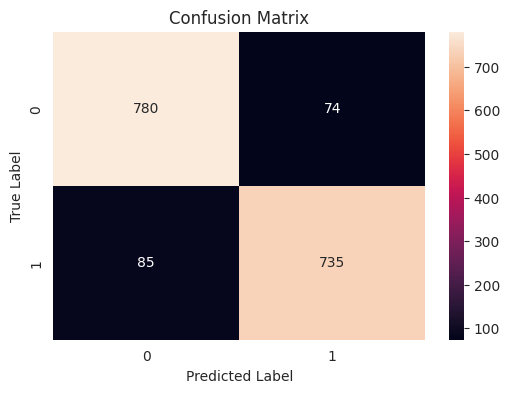

Accuracy sobre el set de testeo: 0.9066852367688022 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       357
           1       0.92      0.90      0.91       361

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
weighted avg       0.91      0.91      0.91       718



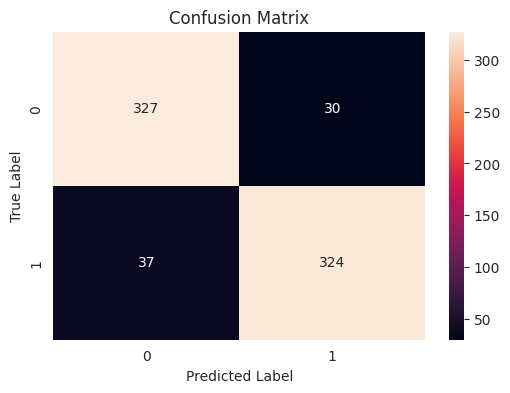

In [100]:
# Entreno el mejor modelo
svm_HRS_grilla=svm_HRS_grilla.best_estimator_
svm_HRS_grilla.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_svm_HRS= svm_HRS_grilla.predict(X_test)
preds_train_svm_HRS = svm_HRS_grilla.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_svm_HRS)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_svm_HRS))
#---------------------------------------------------
# Creando la matriz de confusión
cm = confusion_matrix(y_train, preds_train_svm_HRS)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_svm_HRS)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_svm_HRS))
#---------------------------------------------------
# Creando la matriz de confusión
cm= confusion_matrix(y_test, preds_test_svm_HRS)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

##Random Forest HRS

In [101]:
rf = RandomForestClassifier()

hiperparametros={'max_depth':[5,7,9],'min_samples_leaf':[6,5,7], 'max_leaf_nodes':[11,12,13], 'n_estimators':[100,150,170]}

S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_HRS_grilla=HalvingRandomSearchCV(rf,hiperparametros, cv=S_kfold, factor=3,min_resources='exhaust',n_candidates=50,scoring='f1',n_jobs=-1,verbose=3)
rf_HRS_grilla.fit(X_train,y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 62
max_resources_: 1674
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 50
n_resources: 62
Fitting 5 folds for each of 50 candidates, totalling 250 fits
----------
iter: 1
n_candidates: 17
n_resources: 186
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 2
n_candidates: 6
n_resources: 558
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 1674
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(),
                      min_resources='exhaust', n_candidates=50, n_jobs=-1,
                      param_distributions={'max_depth': [5, 7, 9],
                                           'max_leaf_nodes': [11, 12, 13],
                                           'min_samples_leaf': [6, 5, 7],
                                           'n_estimators': [100, 150, 170]},
                      scoring='f1', verbose=3)

In [102]:
print("Mejores parametros: "+str(rf_HRS_grilla.best_params_))
print("Mejor Score: "+str(rf_HRS_grilla.best_score_)+'\n')
print(f'Accuracy del modelo = {round(accuracy_score(y_test, rf_HRS_grilla.predict(X_test)), 3)}')
print(f'F1 Score del modelo = {round(f1_score(y_test, rf_HRS_grilla.predict(X_test)), 3)}')

Mejores parametros: {'n_estimators': 170, 'min_samples_leaf': 5, 'max_leaf_nodes': 11, 'max_depth': 9}
Mejor Score: 0.8749956692384562

Accuracy del modelo = 0.889
F1 Score del modelo = 0.889


Accuracy sobre el set de entrenamiento: 0.9002389486260454 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       854
           1       0.91      0.88      0.90       820

    accuracy                           0.90      1674
   macro avg       0.90      0.90      0.90      1674
weighted avg       0.90      0.90      0.90      1674



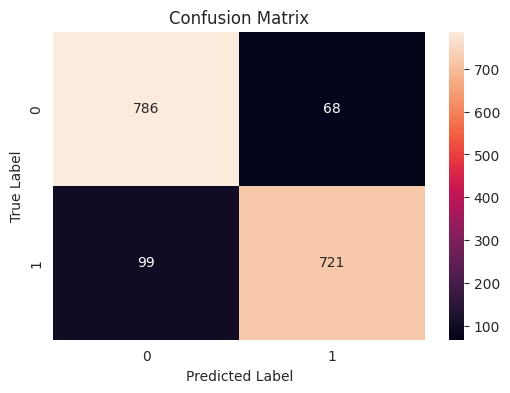

Accuracy sobre el set de testeo: 0.8857938718662952 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       357
           1       0.89      0.88      0.89       361

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



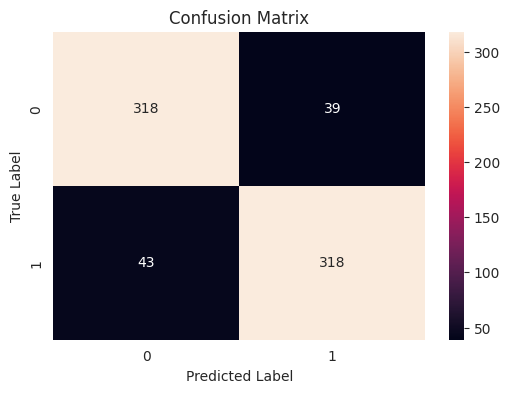

In [103]:
# Entreno el mejor modelo
rf_HRS_grilla=rf_HRS_grilla.best_estimator_
rf_HRS_grilla.fit(X_train, y_train)

# Predicciones del mejor modelo
preds_test_rf_HRS= rf_HRS_grilla.predict(X_test)
preds_train_rf_HRS = rf_HRS_grilla.predict(X_train)

# TRAIN---------------------------------------------------
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, preds_train_rf_HRS)
print('Accuracy sobre el set de entrenamiento:', train_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_train, preds_train_rf_HRS))
#---------------------------------------------------
# Creando la matriz de confusión
cm_train_rf_gs = confusion_matrix(y_train, preds_train_rf_HRS)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_rf_gs, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprobado
#Clase 0: Desaprobado

# TEST---------------------------------------------------
# Accuracy
test_accuracy = metrics.accuracy_score(y_test, preds_test_rf_HRS)
print('Accuracy sobre el set de testeo:', test_accuracy, '\n')
#---------------------------------------------------
# Classification report.
print(metrics.classification_report(y_test, preds_test_rf_HRS))
#---------------------------------------------------
# Creando la matriz de confusión
cm_test_rf_gs= confusion_matrix(y_test, preds_test_rf_HRS)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf_gs, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Aprovado
#Clase 0: Desaprobado

##Resumen de métricas de testeo utilizando HRS

In [104]:
print('Reporte de SVM GS')
print(metrics.classification_report(y_test, preds_test_svm_HRS),'\n')
print('Reporte de Random Forest GS')
print(metrics.classification_report(y_test, preds_test_rf_HRS),'\n')

Reporte de SVM GS
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       357
           1       0.92      0.90      0.91       361

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
weighted avg       0.91      0.91      0.91       718
 

Reporte de Random Forest GS
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       357
           1       0.89      0.88      0.89       361

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718
 



Como se observa no hubo grandes cambios respecto a la iteración anterior.
Nos quedaremos con el modelo de Support Vector Machine y a continuación optimizaremos el umbral de clasificación de ambas clases para mejorar la tasa de falsos positivos y falsos negativos.

##Optimización del umbral para la clasificación de alumnos aprobados o desaprobados

In [105]:
svm_probs_train = svm_HRS_grilla.predict_proba(X_train)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
svm_probs_train = svm_probs_train[:, 1]

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_train))]

# Calculamos el AUC
ns_auc = roc_auc_score(y_train, ns_probs)
svm_auc = roc_auc_score(y_train, svm_probs_train)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

Sin entrenar: ROC AUC=0.500
SVM: ROC AUC=0.948


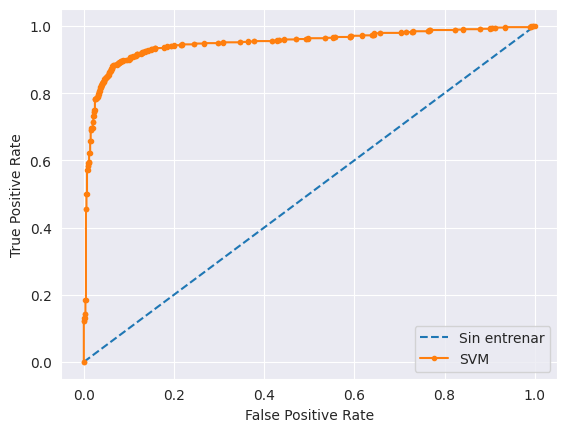

In [106]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
fpr, tpr, umbrales = roc_curve(y_train, svm_probs_train)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(fpr, tpr, marker='.', label='SVM')
# Etiquetas de los ejes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
pyplot.legend()
pyplot.show()

In [107]:
# Calcular la distancia al punto (0, 1) para encontrar el punto de corte óptimo
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
indice_optimo = np.argmin(distancias)
umbral_optimo = umbrales[indice_optimo]

print("Punto de corte óptimo:", umbral_optimo)

Punto de corte óptimo: 0.5263476964151828


In [114]:
etiquetas_predichas = (svm_probs_train >= umbral_optimo).astype(int)  #sobre train

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       357
           1       0.92      0.89      0.90       361

    accuracy                           0.90       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.90      0.90      0.90       718
 



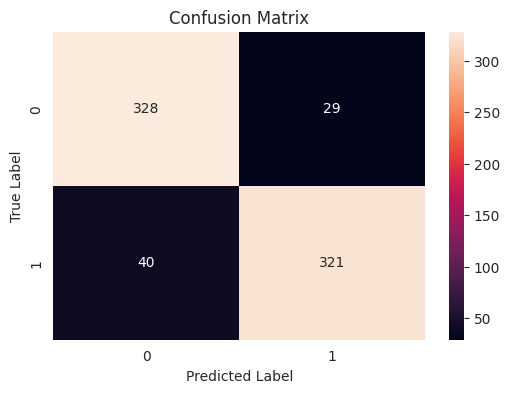

In [115]:
svm_probs_test = svm_HRS_grilla.predict_proba(X_test)
svm_probs_test= svm_probs_test[:, 1]
svm_probs_test_umbral = (svm_probs_test >= umbral).astype(int)

print(metrics.classification_report(y_test,svm_probs_test_umbral), '\n')

cm = confusion_matrix(y_test, svm_probs_test_umbral)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Pueden observarse leves cambios en las métricas. Por un lado cayó levemente la precisión de la clase 0 y tambien el recall de la clase 1. Como vimos, esto causó una leve disminución en el número de falsos positivos, pero tambien la de verdaderos positivos.
Además de una disminución de la misma magnitud en el f1 score.
Cabe destacar que el nuevo umbral no estaba tan lejano al 0.50 usualmente usado. Nos quedamos con el anterior.

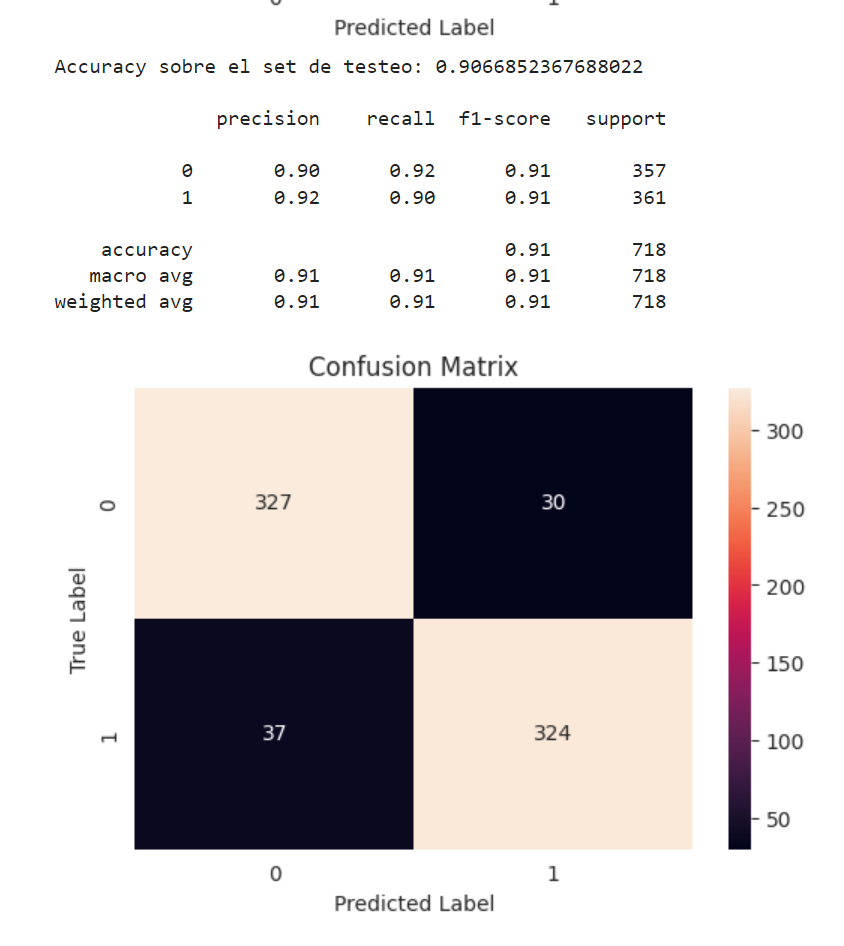

# Modelo Final

In [116]:
#Grafico de predicciones vs real
y_test = y_test.to_numpy()

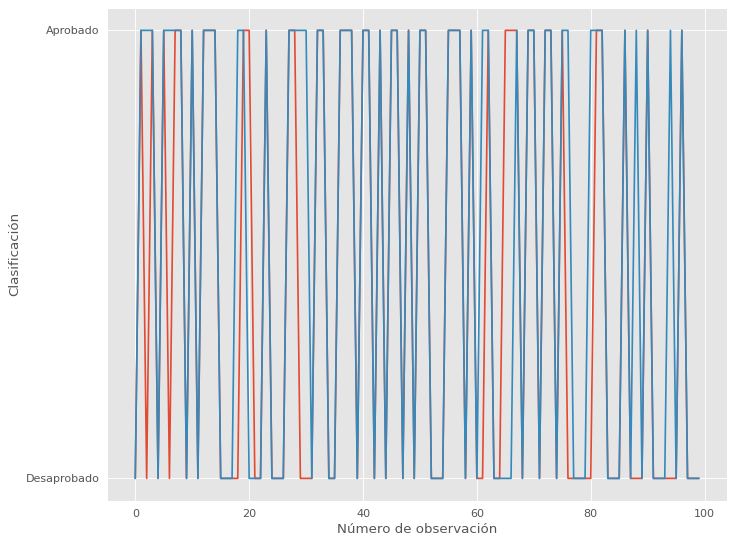

In [117]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

pyplot.style.use('ggplot')
figure(figsize=(10, 8), dpi=80)

pyplot.plot(preds_test_svm_HRS[:100])
pyplot.plot(y_test[:100])
plt.yticks([0, 1], ['Desaprobado', 'Aprobado'])
plt.xlabel('Número de observación')
plt.ylabel('Clasificación')
plt.show()

En esta visualización se puede observar de manera gráfica las oportunidades en las que el modelo acierta o no en la clasificación de los alumnos. Como puede verse, si bien solo estamos visualizando 100 registros, al igual que en las métricas en líneas generales los valores estimados acompañan a los reales.

In [143]:
#GUARDAR modelo
import pickle
modelo = svm_HRS_grilla
with open('modelo_svm_HRS_grilla.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)

In [4]:
#USARLO
# Cargamos el modelo
import pickle
with open('modelo_svm_HRS_grilla.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

## Estandarización de carga de nuevos datos

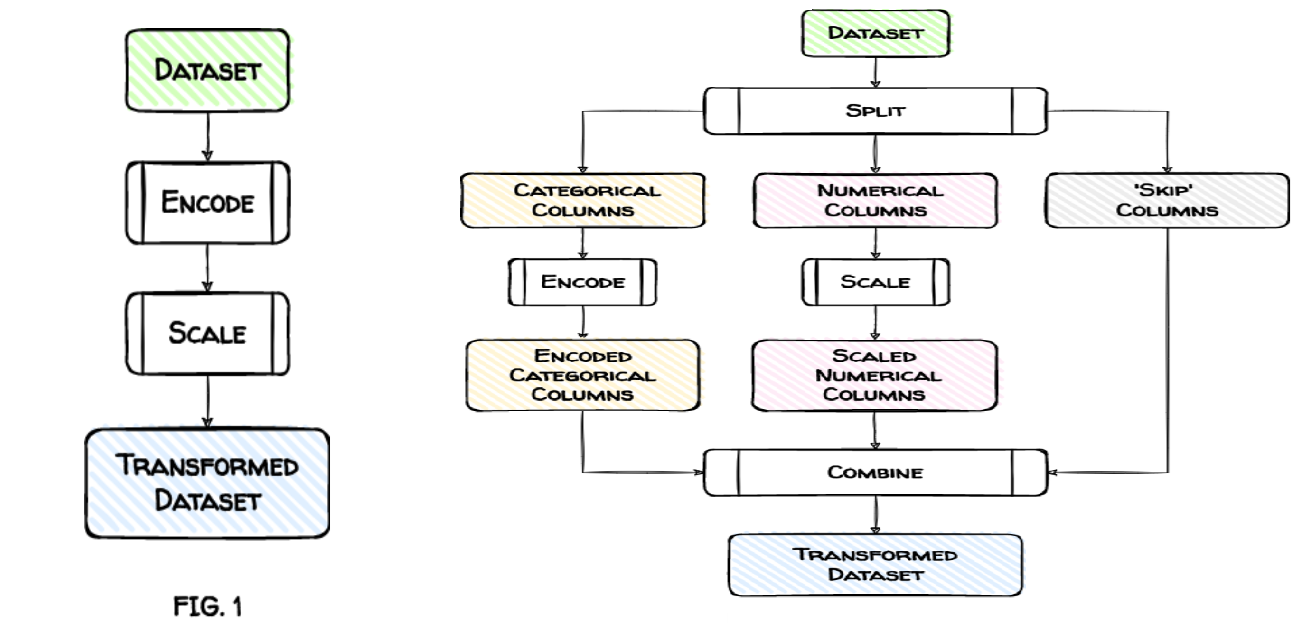

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Definir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('category_pipeline', Pipeline([
            ('encode', OneHotEncoder(drop='first'))
        ]), ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']),
        ('ordinal_pipeline', Pipeline([
            ('encode', OrdinalEncoder())
        ]), ['ParentalSupport', 'ParentalEducation']),
        ('numeric_pipeline', Pipeline([
            ('scale', MinMaxScaler())
        ]), ['Age', 'StudyTimeWeekly', 'Absences'])],
    remainder='drop')

In [20]:
prueba = pd.read_csv(io.BytesIO(dataset["prueba_preprocesador.csv"]),index_col=[0] )
prueba.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [21]:
df2 = preprocessor.fit_transform(prueba)
df3= pd.DataFrame(df2)
df3


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.666667,1.000000,0.269231
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.716769,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.000000,0.000000,1.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.666667,0.372413,0.538462
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.666667,0.029567,0.653846
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.254792,0.000000
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.000000,0.729117,0.384615
7,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.000000,0.717776,0.846154
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.022495,0.038462
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.333333,0.911077,0.000000


Acá probe escribir como seria un preprocesador de nuevos datos con el data wrangling que había probado en primera instancia (encoder que intente usar originalmente estan en el Script en archivo aparte "Data_Wrangling_con_error.ipynb").
Además agregue algunas variables que no tuve que modificar en este trabajo ya que el dataset las traía encodeadas.
Faltaría resolver que método de imputación de datos utilizar.

#Conclusiones Finales

Después de llevar a cabo el proyecto de machine learning mediante un modelo de aprendizaje automatico para clasificar el desempeño de alumnos de secundaria para evaluar posibles factores que estén afectando el desempeño estudiantil, podemos concluir que logramos llegar a un modelo de support vector machines con un valor de accuracy  y de f1 score de 0.91, logrando identificar a los alumnos tanto aprobados como desaprobados e identificando de manera general que el factor más influyente en el rendimiento académico serían las ausencias a clases y el apoyo que reciban los alumnos de parte de las familias, y no tanto así si realizan o no actividades extracurriculares.

Como sugerencia se propone brindar apoyo particular a los estudiantes para poder evaluar las razones de estas inasistencias, involucrando activamente  las familias en este proceso y dando a conocer como esto afecta el rendimiento académico.

También intentar identificar otros posibles factores en el entorno escolar y personal que lleven a disminuir o favorecer el rendimiento académico.

Y por último y no menos importante seguir recolectando datos y monitoreando estos rendimientos para descartar alguna estacionalidad en los registros y disminur posibles errores.

En cuanto a los resultados del modelo, podría evaluarse reducir la cantidad de atributos con los que trabajar los modelos, dado que en alguno de ellos se evaluó la importancia de las diferentes variables y son algunas pocas las más influyentes.

Esto ya se comenzó a observar en el EDA pero podría evaluarse en que magnitud afecta la performance de los modelos y en caso solo quedar algunas pocas evaluar si este tipo de modelos serían los más convenientes o podría resolverse la problemática con metodologías más sencillas o por otro lado, ver de incorporar otras variables que la institución observa podría ser de interés.

Además, no se descartaría la opción de probar otras opciones de data wrangling como ser:
- Crear una variable resumen de las actividades extracurriculares, asi mantener esa información a la vez que se reduce la cantidad de atributos.

- Probar trabajar con una clasificación multiclase para evaluar posibles relaciones entre cada clasificación y alguno de los factores del dataset.

#Uso de Lazy Predict

Al finalizar el proceso corrí la herramienta lazy predict para investigar como era la performance del modelo elegido respecto a otros posibles, incluso entre varios no estudiados.

Y finalmente observamos que el modelo utilizando support vector machine está entre los mejores, entre otros que desconozco, si bien no se con que hiperparámetros los corre el lazy classifier. También se podría haber probado con una regresión logística.

In [17]:
pip install lazypredict

In [18]:
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [20]:
lazy_clf= LazyClassifier(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = lazy_clf.fit(X_train, X_test,
							y_train, y_test)
models


 24%|██▍       | 7/29 [00:00<00:00, 22.35it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:02<00:00, 11.77it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 820, number of negative: 854


100%|██████████| 29/29 [00:02<00:00, 11.11it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489845 -> initscore=-0.040627
[LightGBM] [Info] Start training from score -0.040627


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.90,0.90,0.90,0.90,0.05
RidgeClassifierCV,0.90,0.90,0.90,0.90,0.04
RidgeClassifier,0.90,0.90,0.90,0.90,0.03
GaussianNB,0.90,0.90,0.90,0.90,0.02
CalibratedClassifierCV,0.89,0.89,0.89,0.89,0.05
LinearSVC,0.89,0.89,0.89,0.89,0.10
LogisticRegression,0.89,0.89,0.89,0.89,0.03
NuSVC,0.89,0.89,0.89,0.89,0.19
SVC,0.89,0.89,0.89,0.89,0.14
